# #1

This first file, plots.py passes the graphing instructions to the kernel, so that I can create my visualizations later. It is saved as a .py file in the directory that my homework and notes are in. The .py file was created in Spyder.

In [24]:
#plots.py

#os module allows you to access commandline 
#functions from python
import os
import pandas as pd
#math and data library
import numpy as np
import matplotlib.pyplot as plt

def plot_ts_scatter(df, s = 75, figsize = (40,20),
                    save_fig = False, pp = None):
    #gather variables from df
    plot_vars = list(df.keys())
    #cycle through each variable for x val
    for x in plot_vars:
        #cycle again for y value
        for y in plot_vars:
            #make sure that x does not equal y
            if x != y:
                fig, ax = plt.subplots(figsize = figsize)
                #Create list of years from index
                #Years will be represented by color
                if "Year" not in df.keys():
                    # create list from index
                    # convert each index value to string
                    # only include first 4 characters, which is the year
                    # create an integer from those characters
                    df["Year"]=[int(str(ind)[:4])for ind in df.index]
                
                df.plot.scatter(x = x, y = y, s = s, ax = ax,
                                c = "Year", cmap = "viridis")
                
                # Turn the text on the x-axis so that it reads vertical
                ax.tick_params(axis = "x", rotation = 90)
                # get rid of tick lines
                ax.tick_params("both", length = 0, which="both")
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    #identify directory to save figure
                    directory = "plots/" + x[:12] + " " + y[:12] + "c=Year"
                    plt.savefig(directory + str(plot_vars).replace("[","").replace("]", "")[:40] + "scatter.png",
                               bbox_inches = "tight")
                if pp != None: pp.savefig(fig, bbox_inches = "tight")

Next, I will need a function that helps to download data from FRED using pandas_datareader

In [2]:
#FRED.py
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, start, end = datetime.datetime.today(), freq="A"):
#2d would be every 2 days, 3m is 3 months, a quarter, we used A annual
    #check if new column is first column of data
    #if true then create a new dataframe
    i = 0
    for key, code in data_codes.items():
        if i == 0:
            df = web.DataReader(code, "fred", start, end).resample(freq).mean()
            #rename column so that code is replaced by the key (variable name)
            df.rename(columns = {code:key}, inplace = True)
            i = None
        else:
            #if DataFrame exists, add new column
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
        
    return df
    #if not, add to existing dataframe

I have three Spyder files in my directory which will assist in gathering the data and visualizing it. I import the entirety of each file below.

Next, I need to choose data and pass the correct data codes so that I can gather those data groups.

In [3]:
#fedProject.py
from datlib.stats import *
from datlib.plots import *
from datlib.FRED import *
data_codes = {"Export Price Index (End Use) Soybeans and soybean by-products":"IQ00100",
              "Export Price Index (End Use) Corn":"IQ00200"}
start = datetime.datetime(2000, 7, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "M")

data

#fed is often in millions of dollars

,Export Price Index (End Use) Soybeans and soybean by-products,Export Price Index (End Use) Corn
DATE,,
2000-07-31,96.1,88.7
2000-08-31,93.1,84.7
2000-09-30,100.6,90.2
2000-10-31,96.8,94.7
2000-11-30,93.8,101.0
...,...,...
2020-04-30,171.5,166.1
2020-05-31,167.4,156.5
2020-06-30,169.6,162.8


I will plot the both the export indices for corn and soy in line graph form and as scatterplots. 

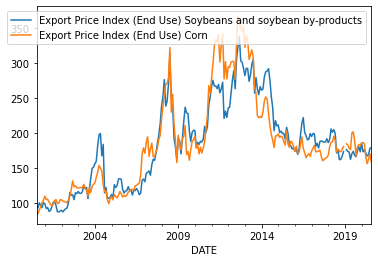

In [4]:
plt.rcParams.update({"font.size":10})
data.plot.line()

The Export Price Index Soybeans and Export Price Index Corn move in very similar fashions. A price index is a measure of the average change in prices. Corn and soybeans have traded similarly over time, which is explained through their general similarities in the world market. While they offer distinct nutrition properties as a starch and an oilseed, they are often grown in the same region and exported out of these regions (the U.S. and Brazil in particular) to other countries who cannot grow them as main sources of food or animal feed. In fact, corn and soy are often grown back to back in the same field in Brazil and were grown intercropped together in Mexico. It is no surprise that their line graph shows such a similarity in change. We can see that when farming experienced the 2010-2013 super cycle, corn had a higher price index, likely due to not being quite as important of a player in the world market and therefore experiencing a greater increase in value relative to its price.

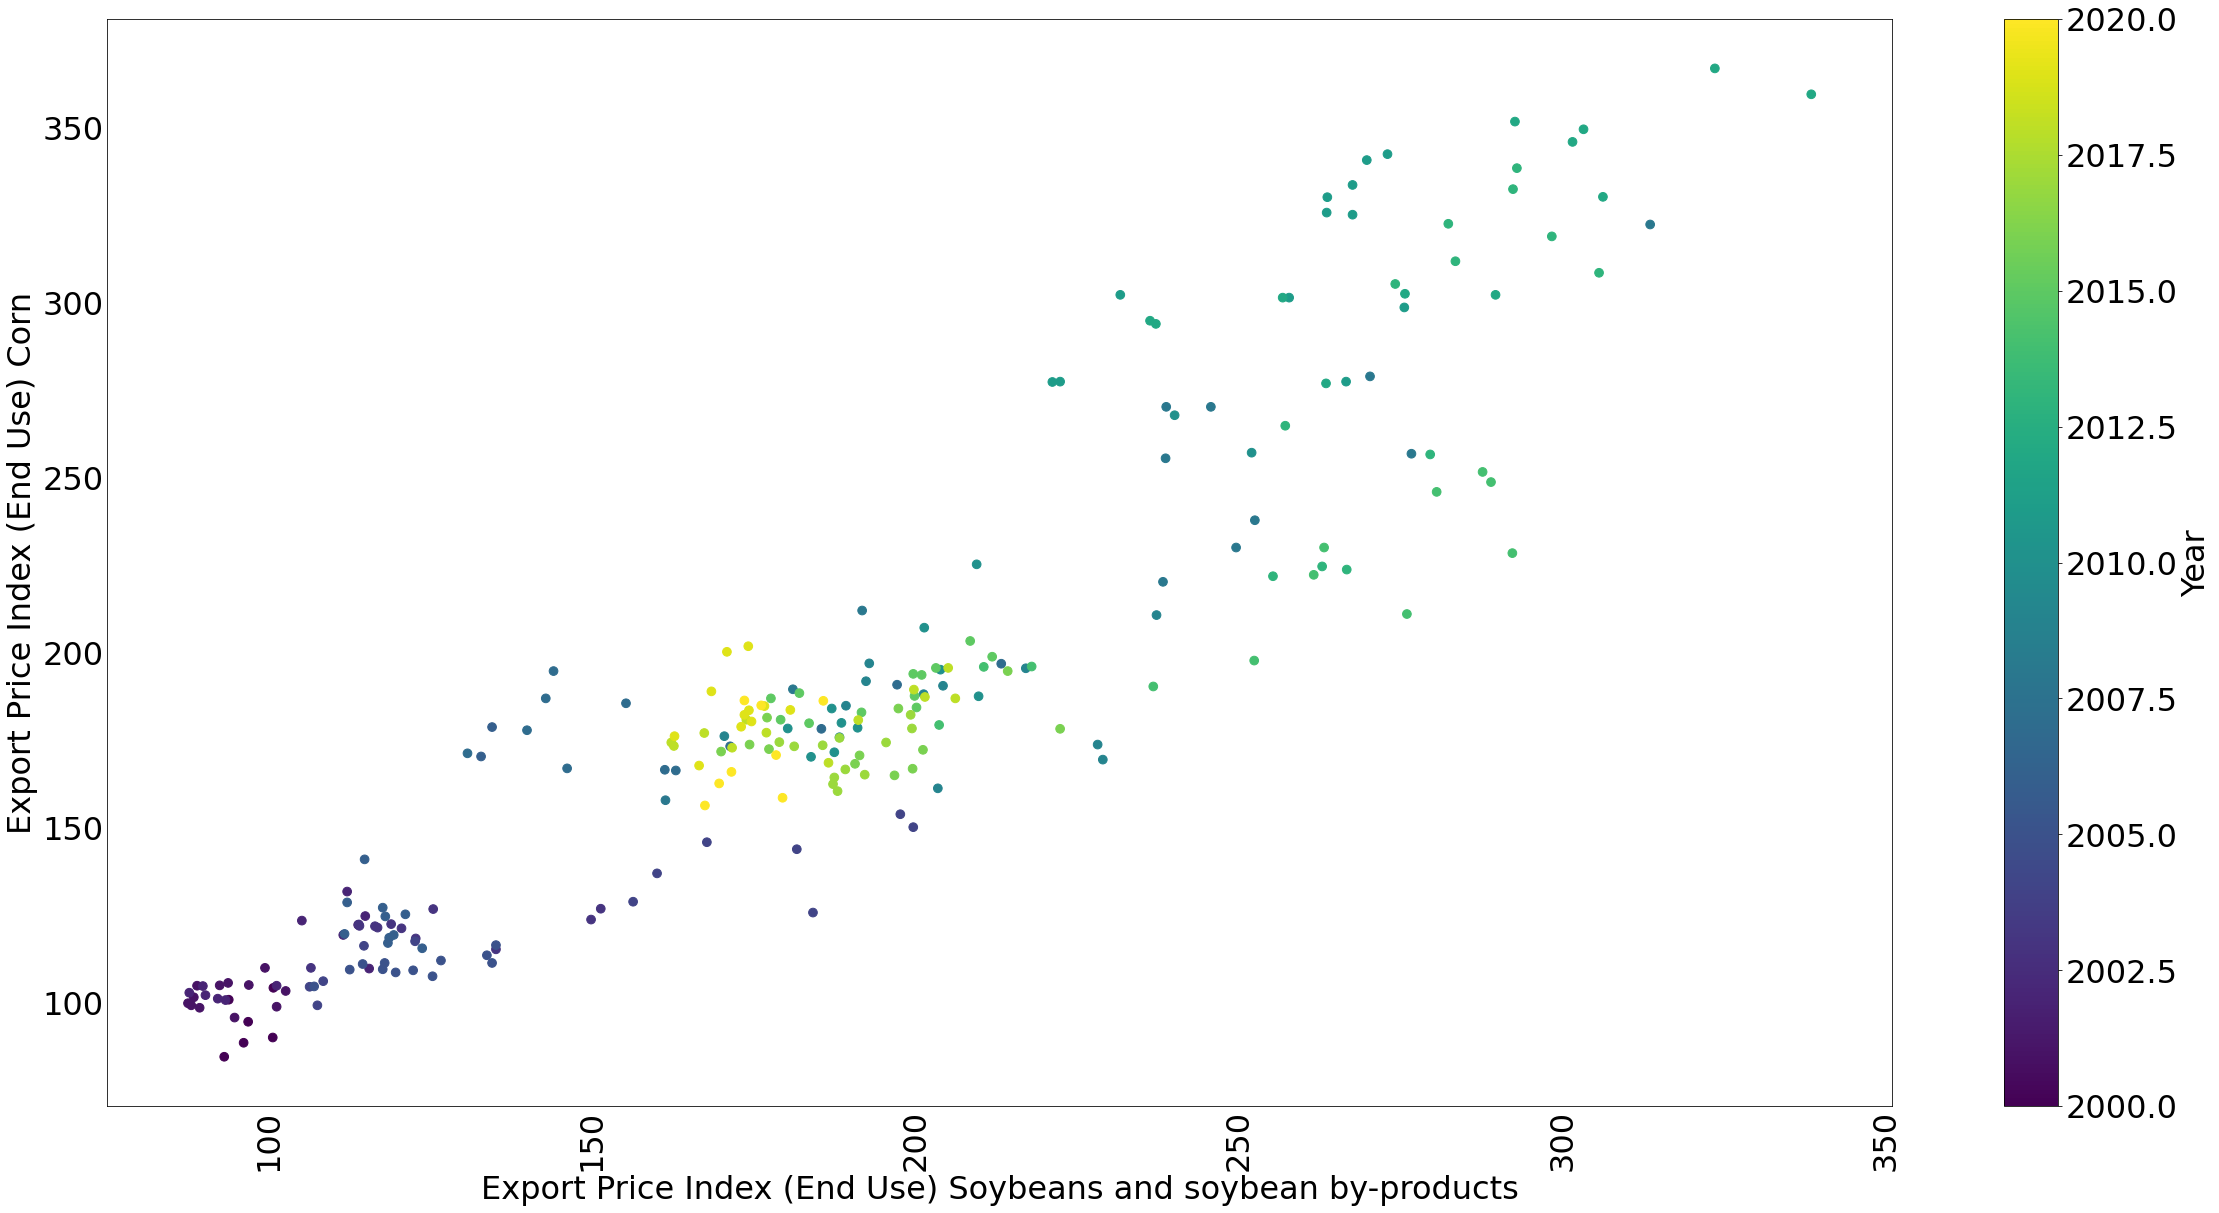

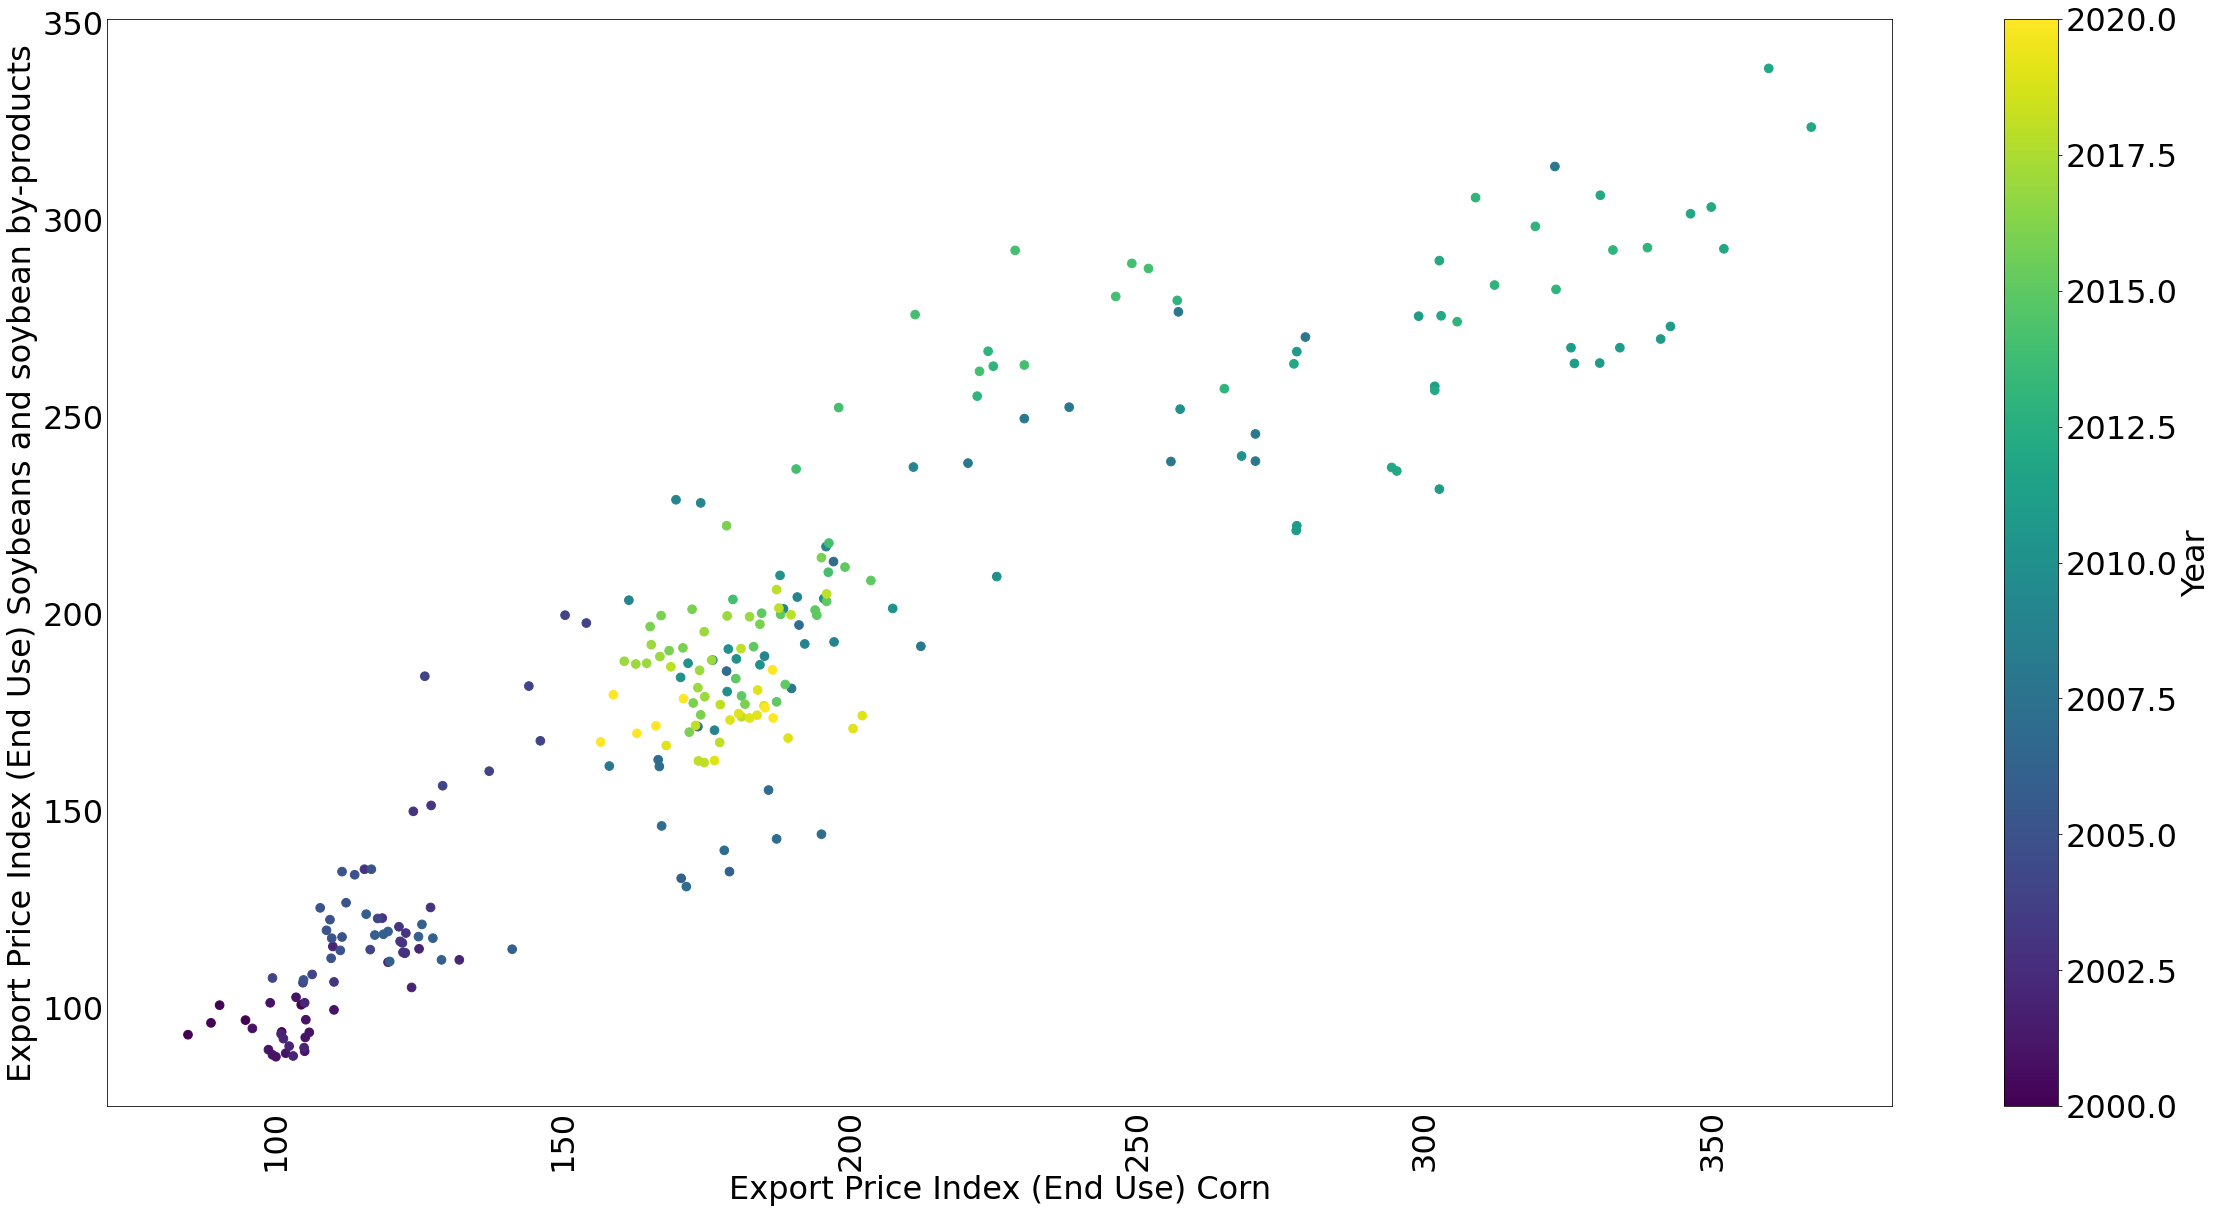

In [5]:
plt.rcParams.update({"font.size":32})
plot_ts_scatter(data)

Unlike the examples in class that showed values more or less increasing over time, it is observed here that the lighter yellow color where the 2017-2020 price index is shown has regressed back to levels similar before the farming super cycle that occurred prior to 2014.

In [6]:
data_codes = {"Unemployment Rate: Aged 15-64: All Persons for Sweden":"LRUN64TTSEQ156S",
              "Unemployment Rate: Aged 15 and Over: All Persons for Australia":"LRUNTTTTAUM156S",
              "Unemployment Rate for United States":"UNRATE"}
start = datetime.datetime(2005, 7, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "Q")

data

,Unemployment Rate: Aged 15-64: All Persons for Sweden,Unemployment Rate: Aged 15 and Over: All Persons for Australia,Unemployment Rate for United States
DATE,,,
2005-09-30,7.840834,4.957692,4.966667
2005-12-31,7.715907,5.007709,4.966667
2006-03-31,7.483913,5.045244,4.733333
2006-06-30,7.508024,4.858089,4.633333
2006-09-30,6.980137,4.677131,4.633333
2006-12-31,6.625723,4.515551,4.433333
2007-03-31,6.526688,4.550600,4.500000
2007-06-30,6.318878,4.325621,4.500000
2007-09-30,6.067934,4.253459,4.666667


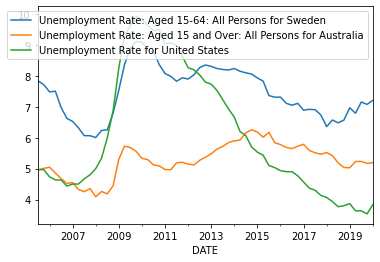

In [7]:
plt.rcParams.update({"font.size":10})
data.plot.line()

I had wanted to compare two countries with very different COVID policies: Australia almost China-level forcing people into their homes, and Sweden doing no such thing, along with the U.S. as a middle-man where states choose their policies. Since Sweden only has quartly unemployment data, comparing within 2020 was not an option. However, it seems Seden and Australia actually experience very similar unemployment rate movements, while the U.S. plays its own game managing the recession of 2008/2009 that took until 2017 to recover to previous levels. As seen below, the scatterplots for these variables show little to no trend that may be shared by the values, although Australia and Sweden form the most compact plots due to changing rates at similar intervals. Perhaps a better comparison would have been between U.S. states like CA, FL, TX, and NY that are likely reporting unemployment more often then quarterly.

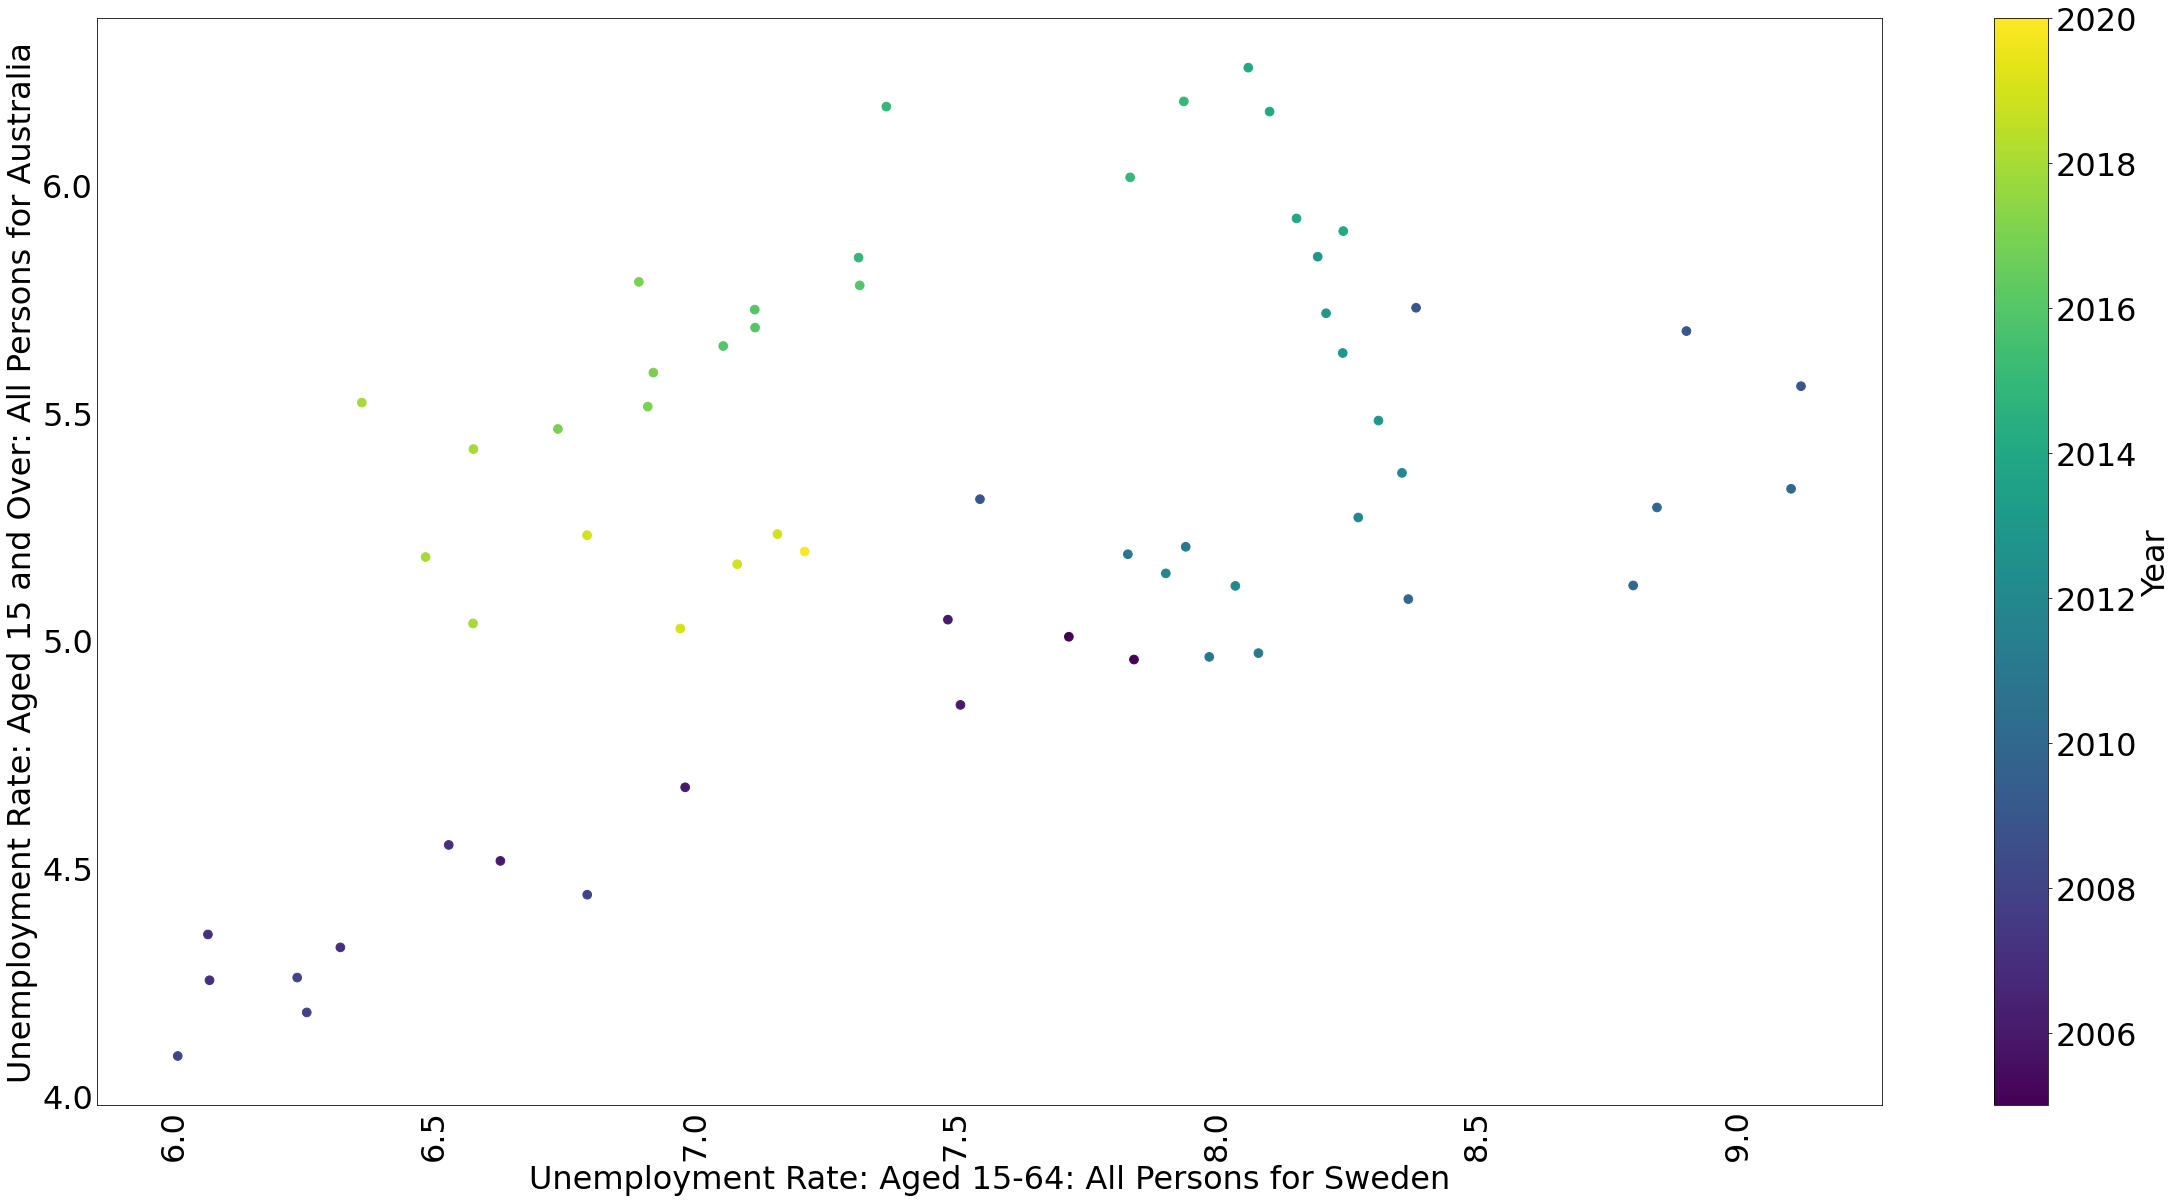

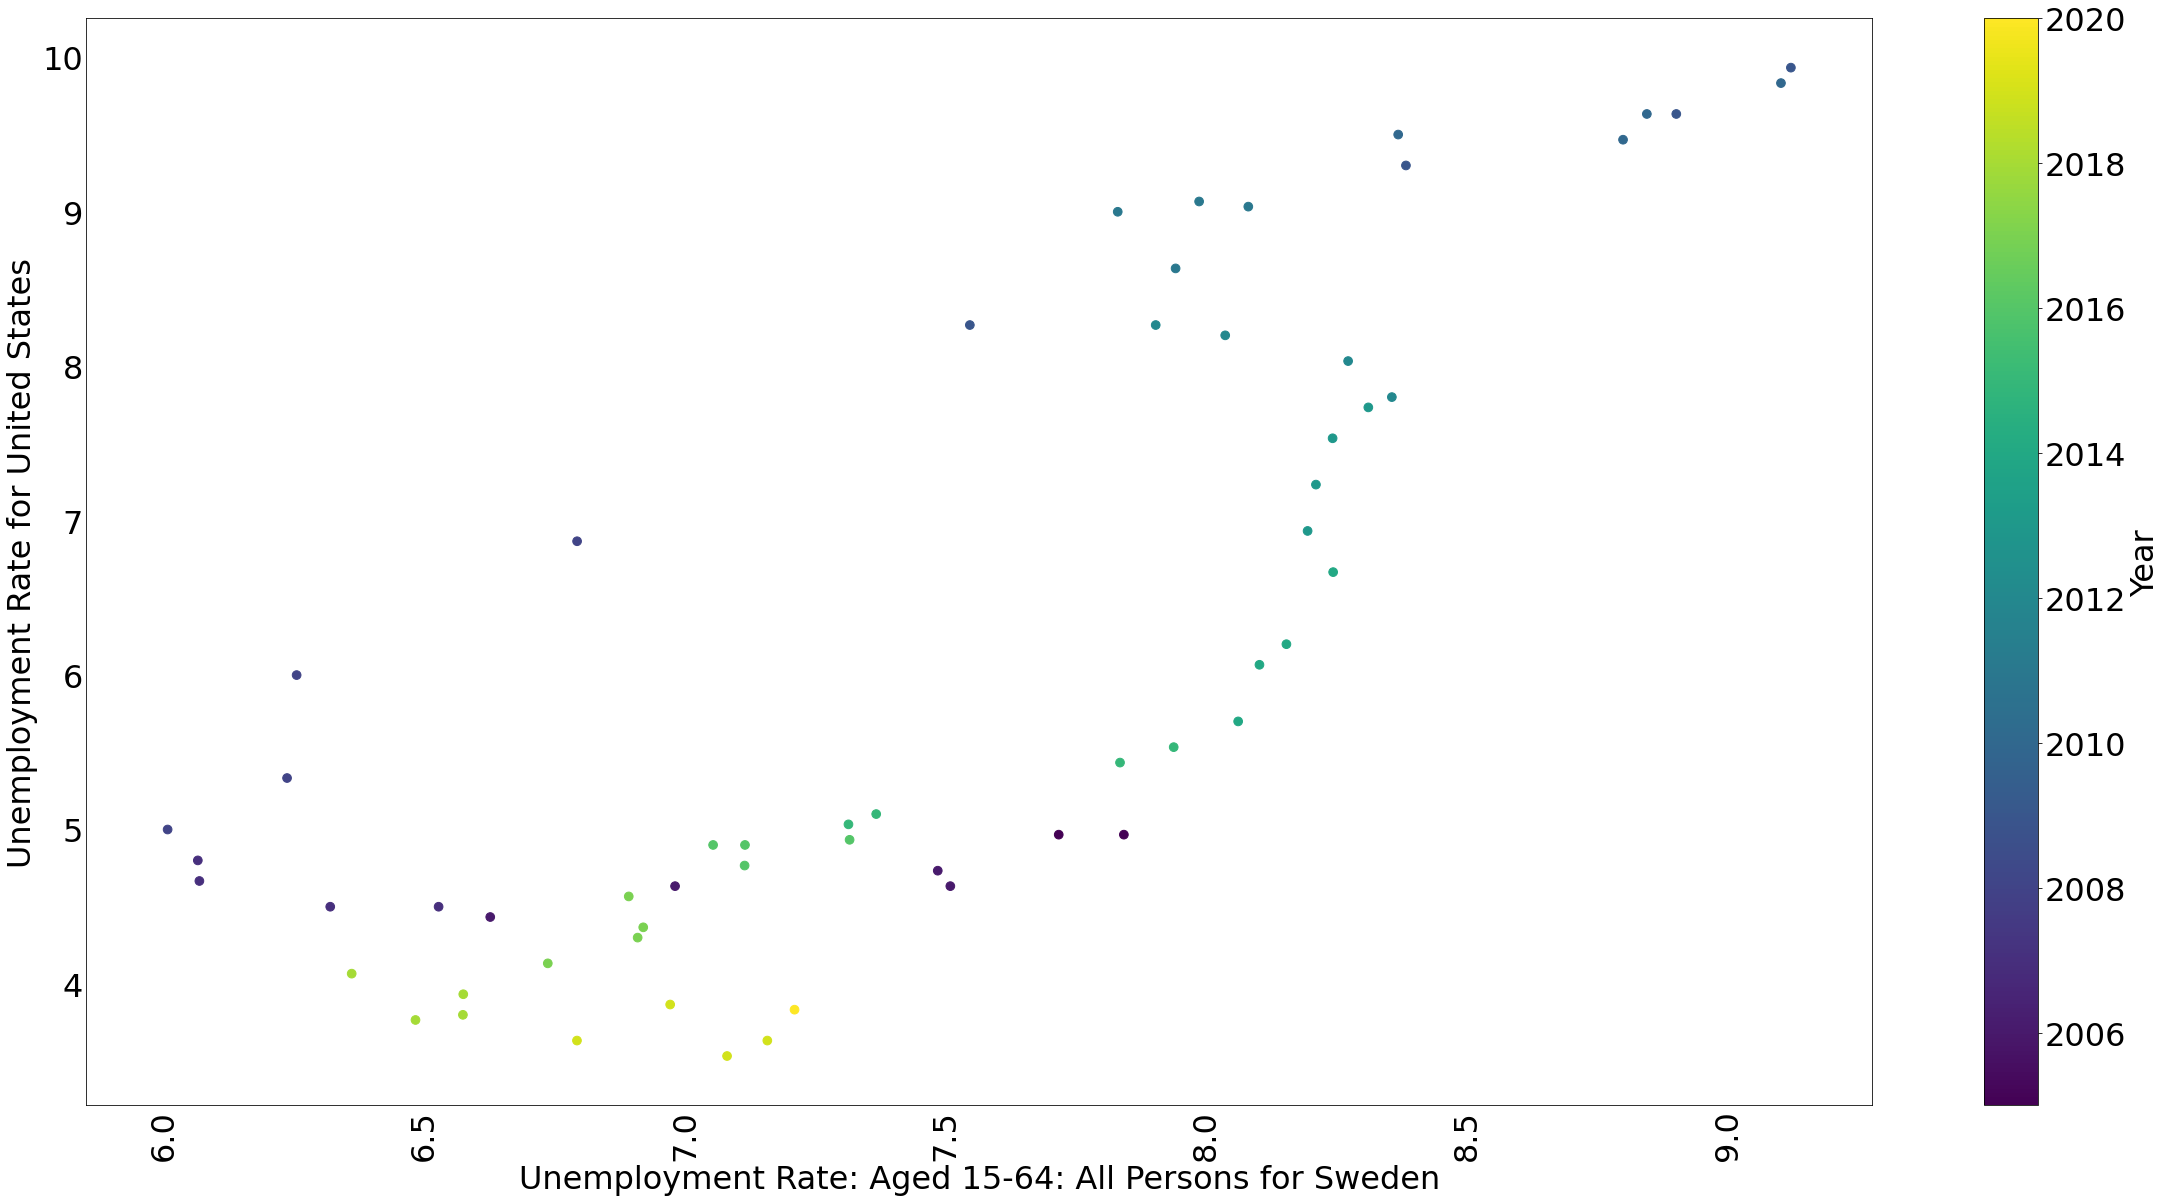

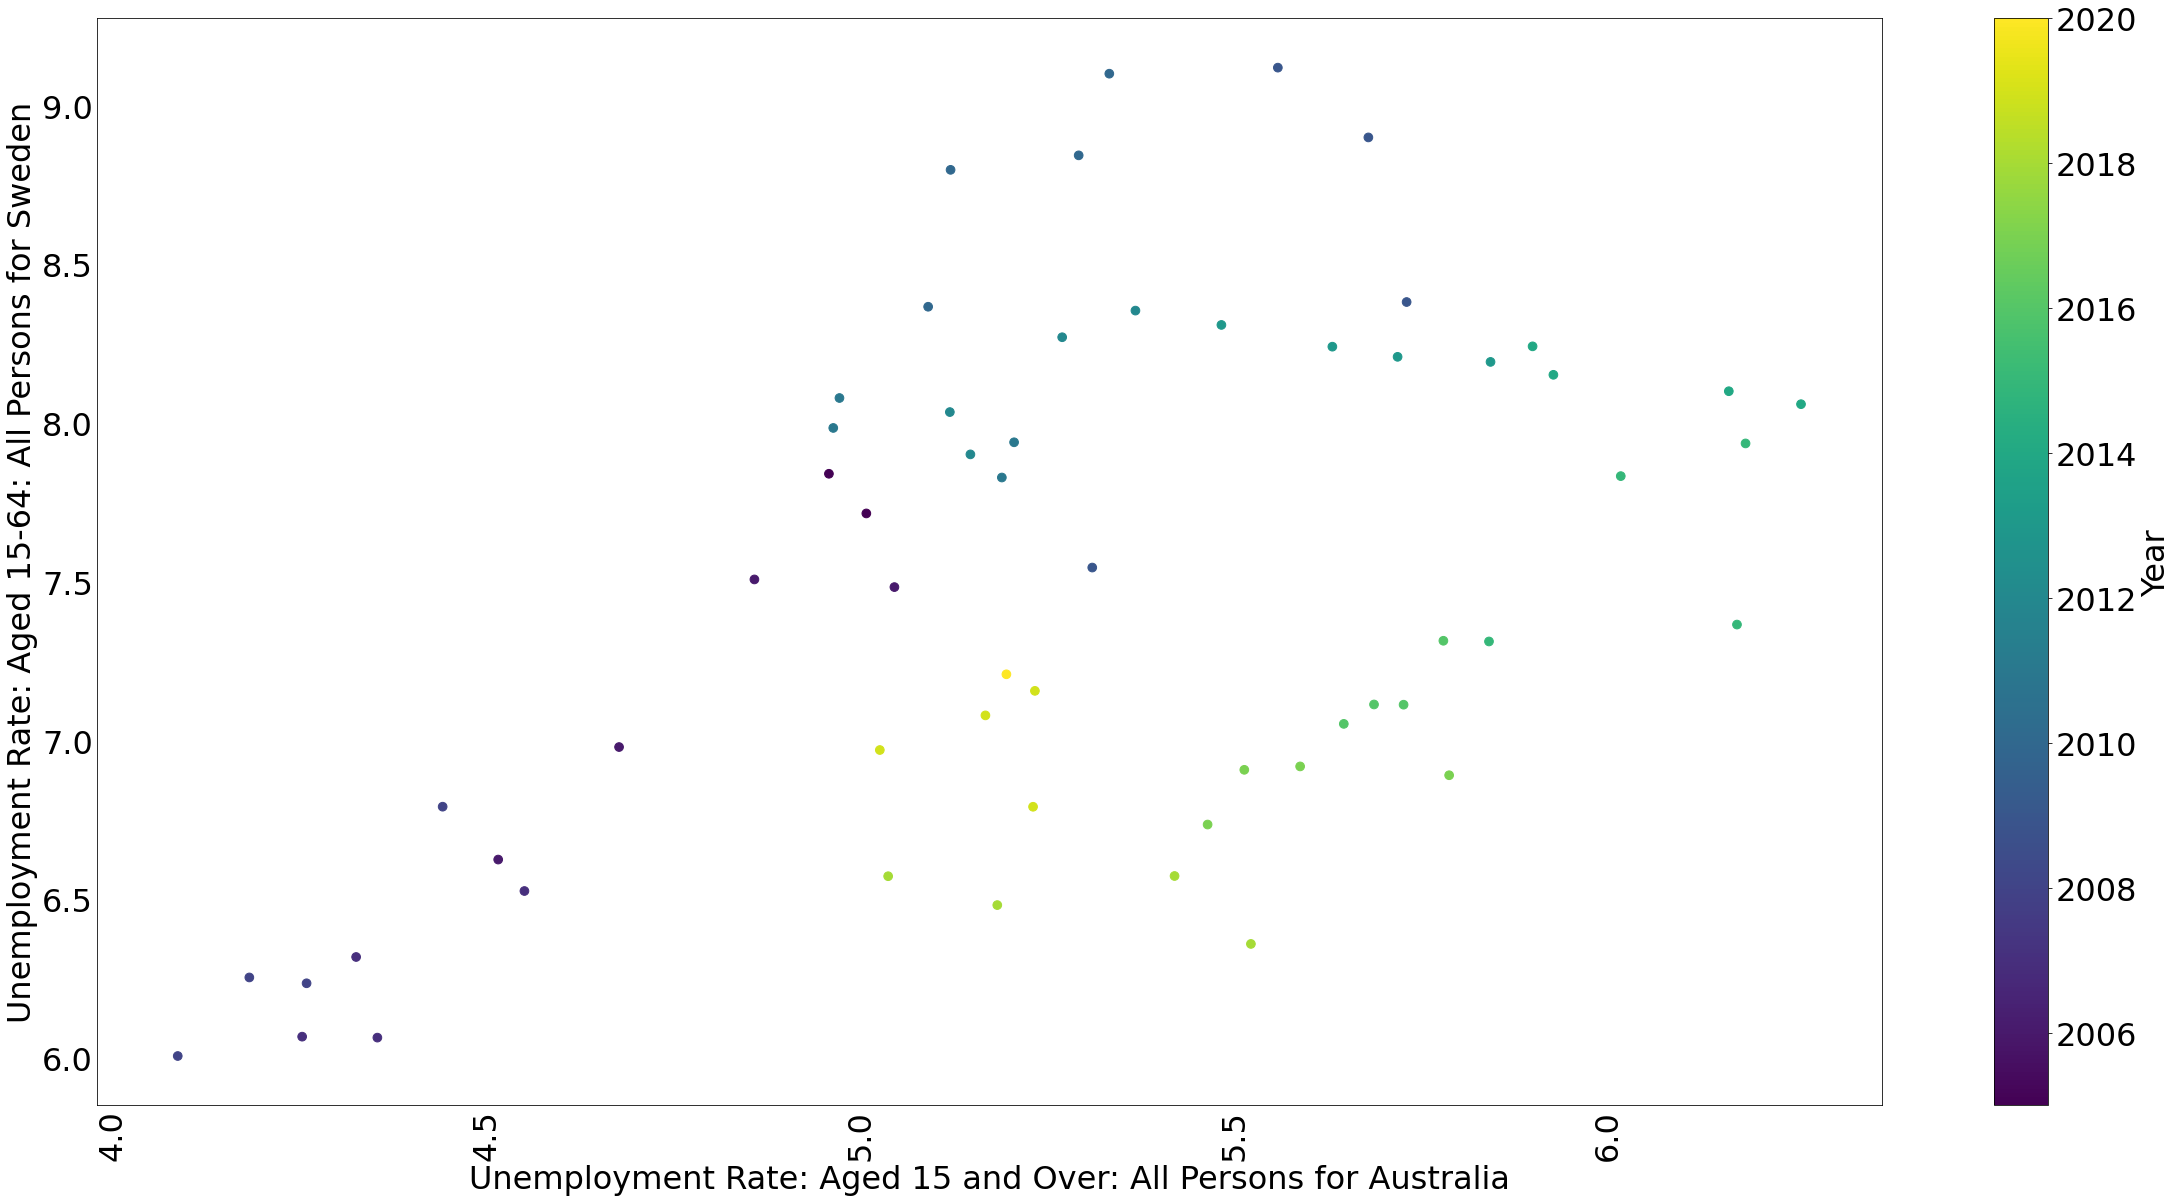

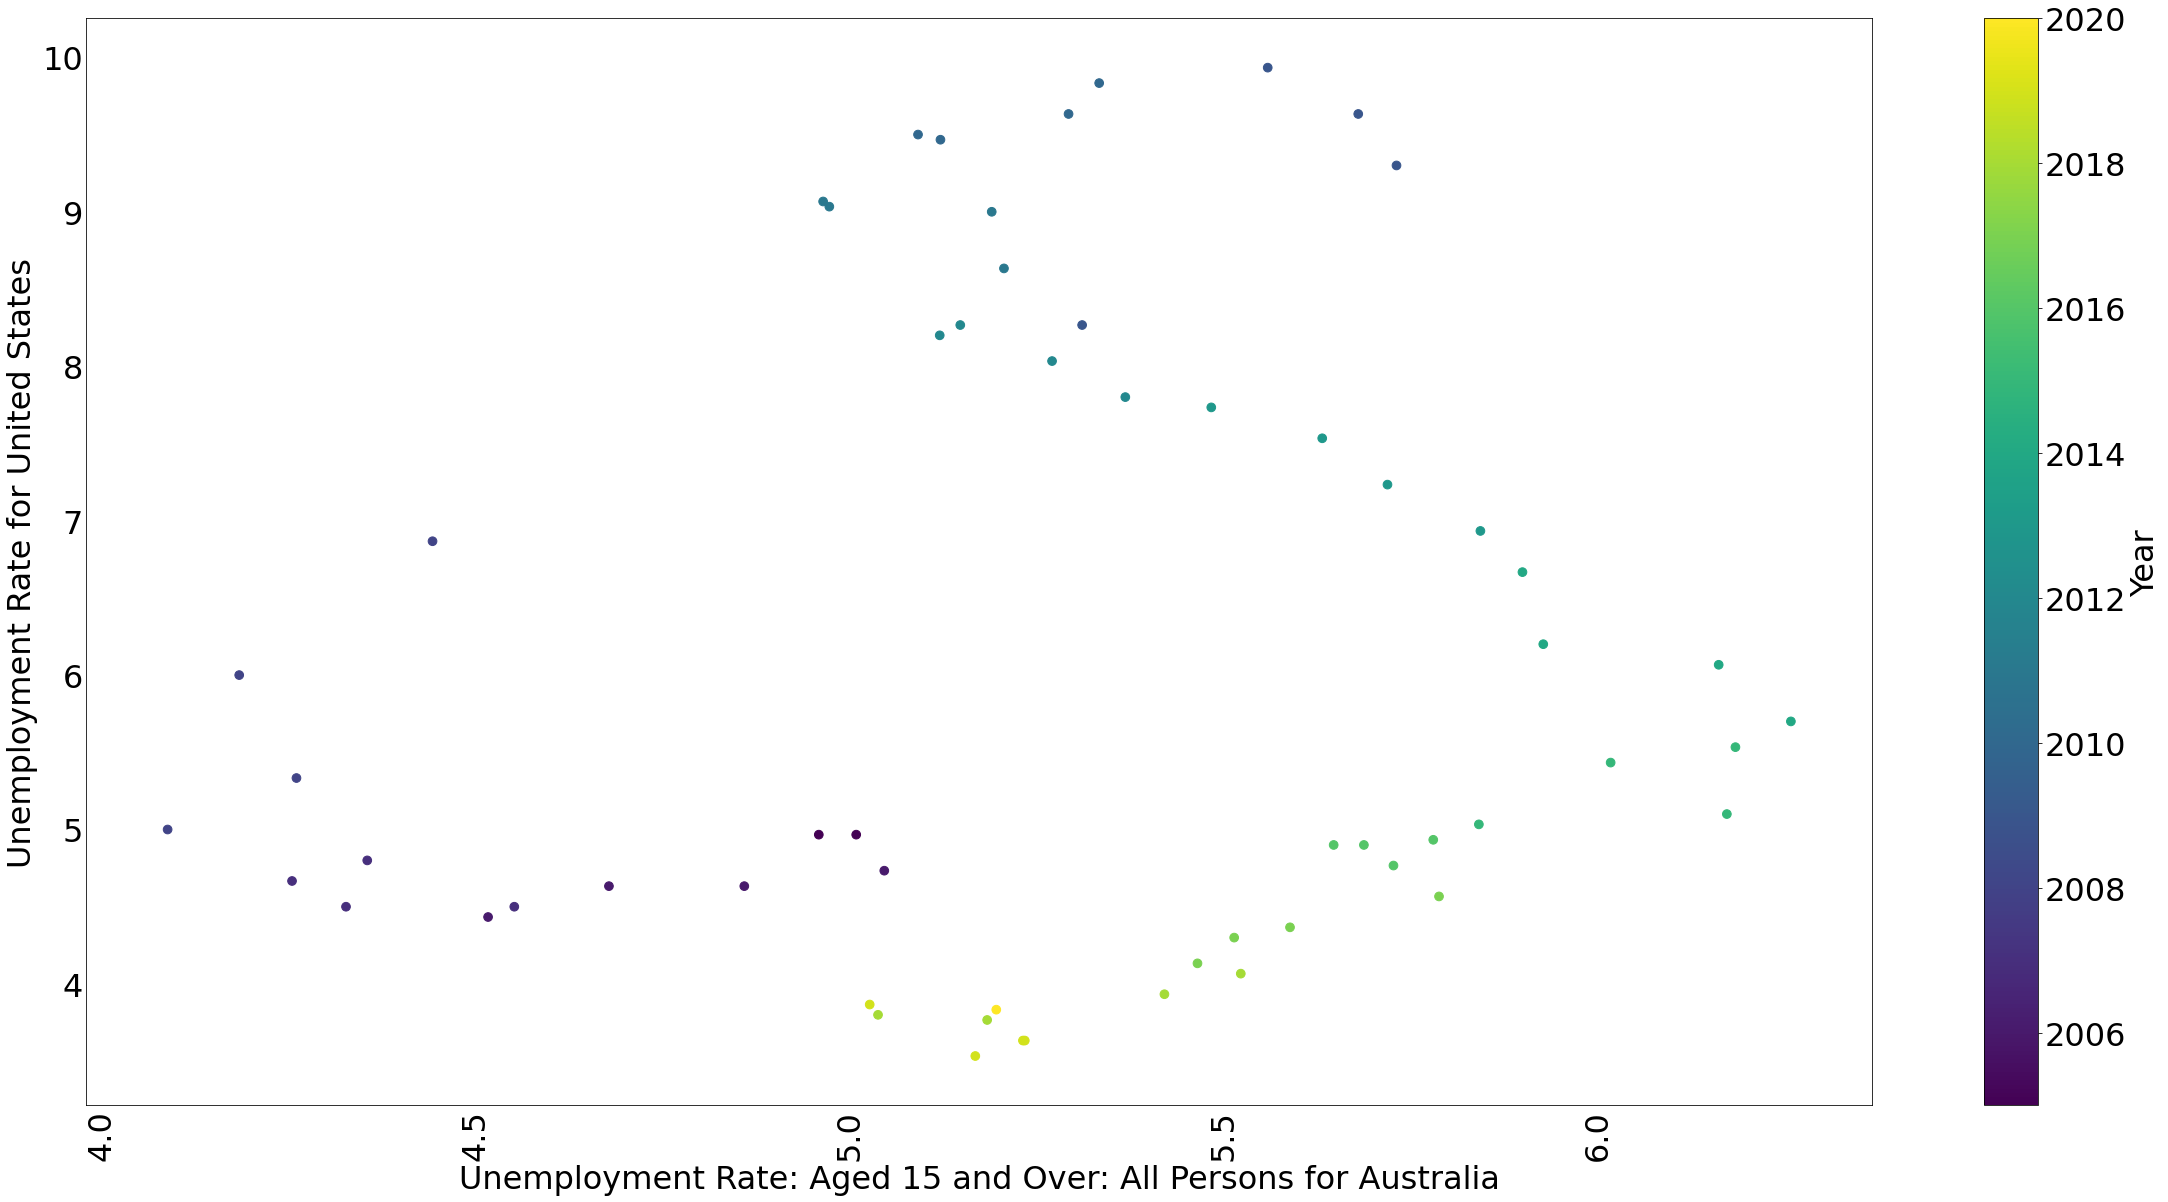

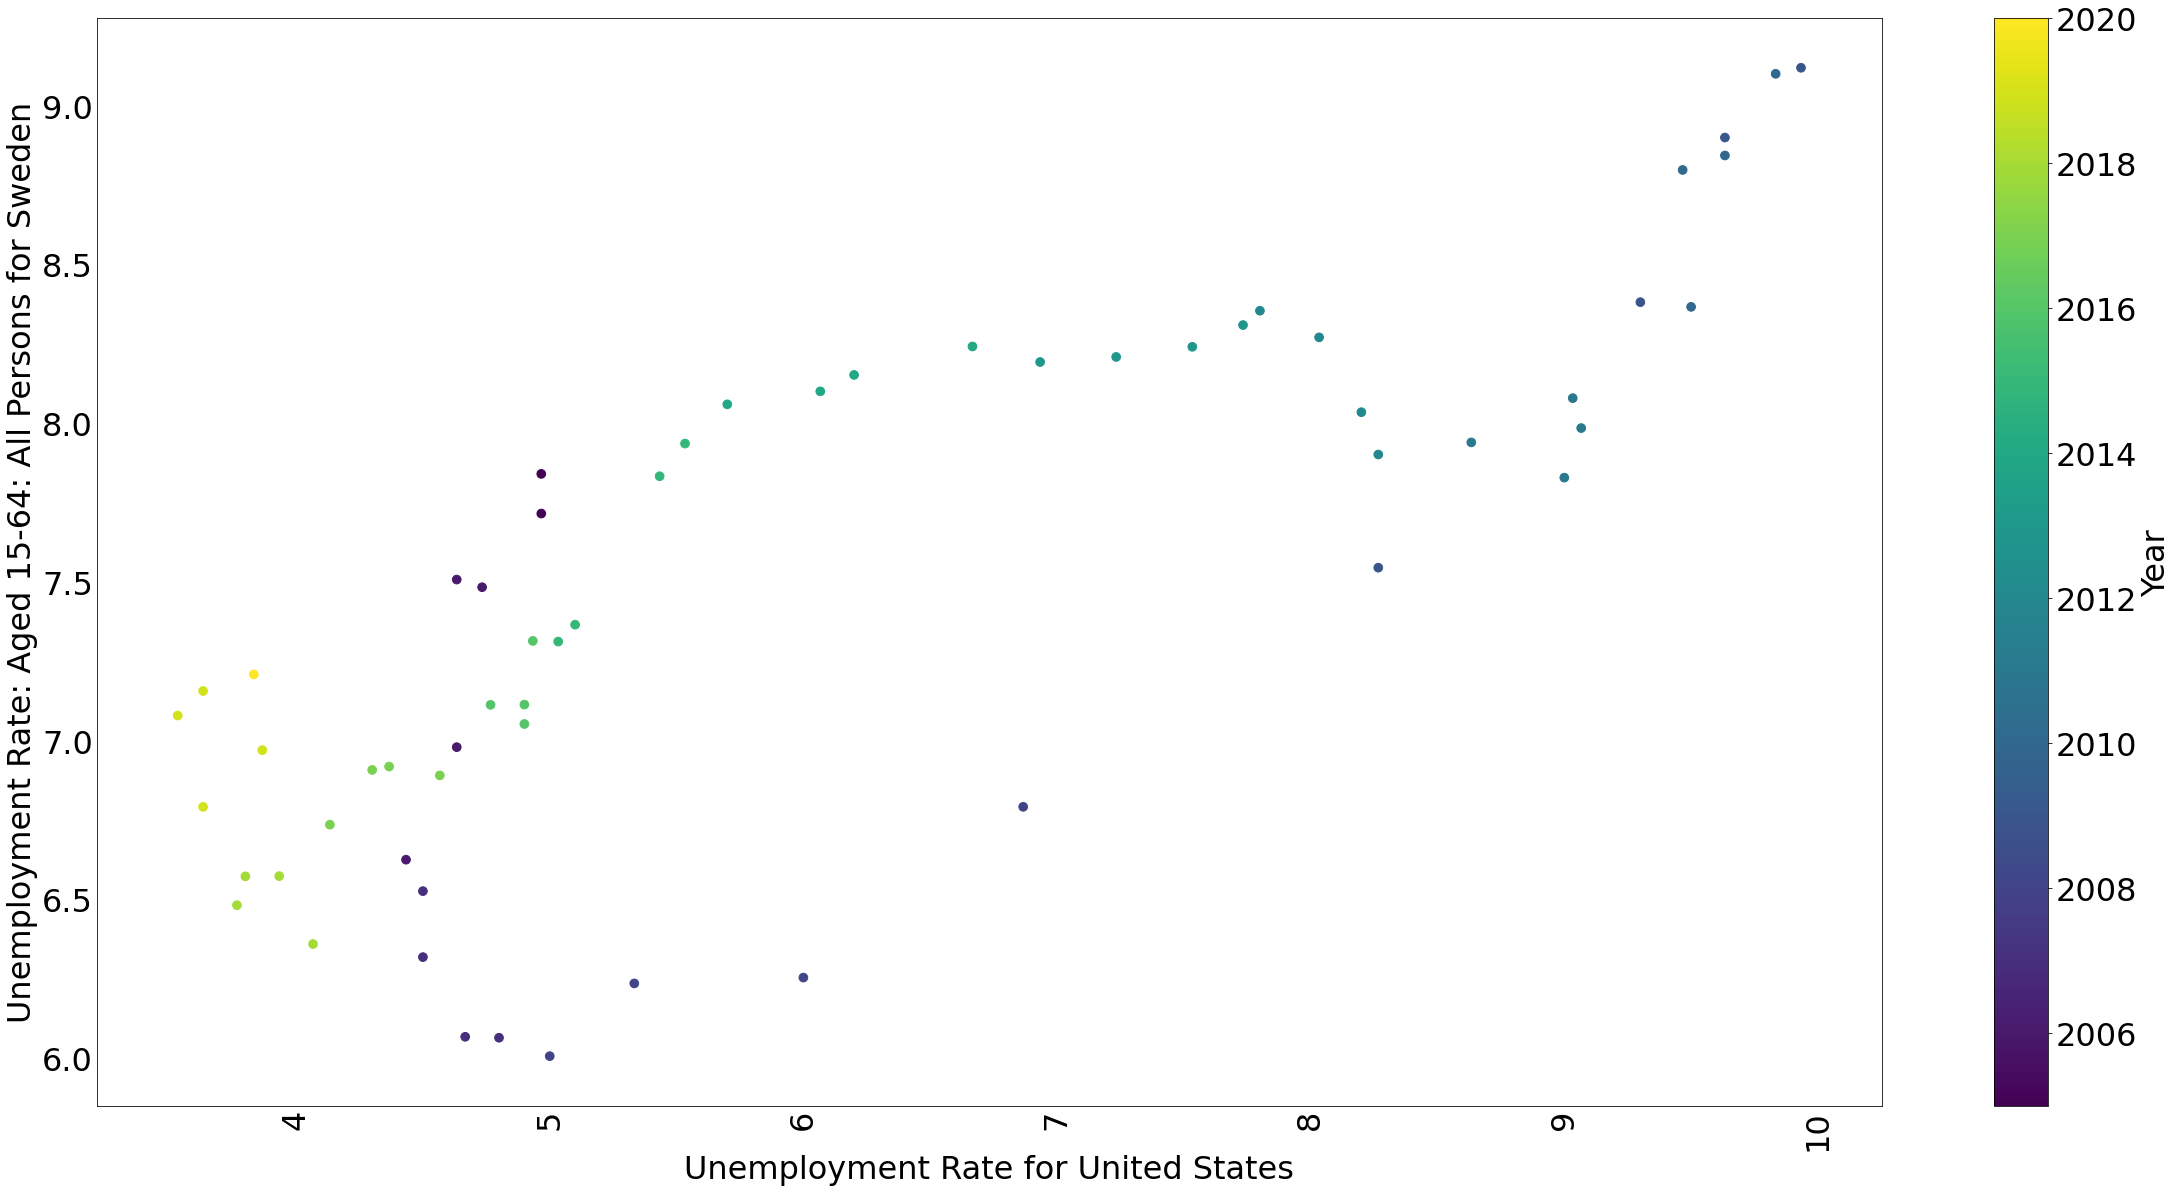

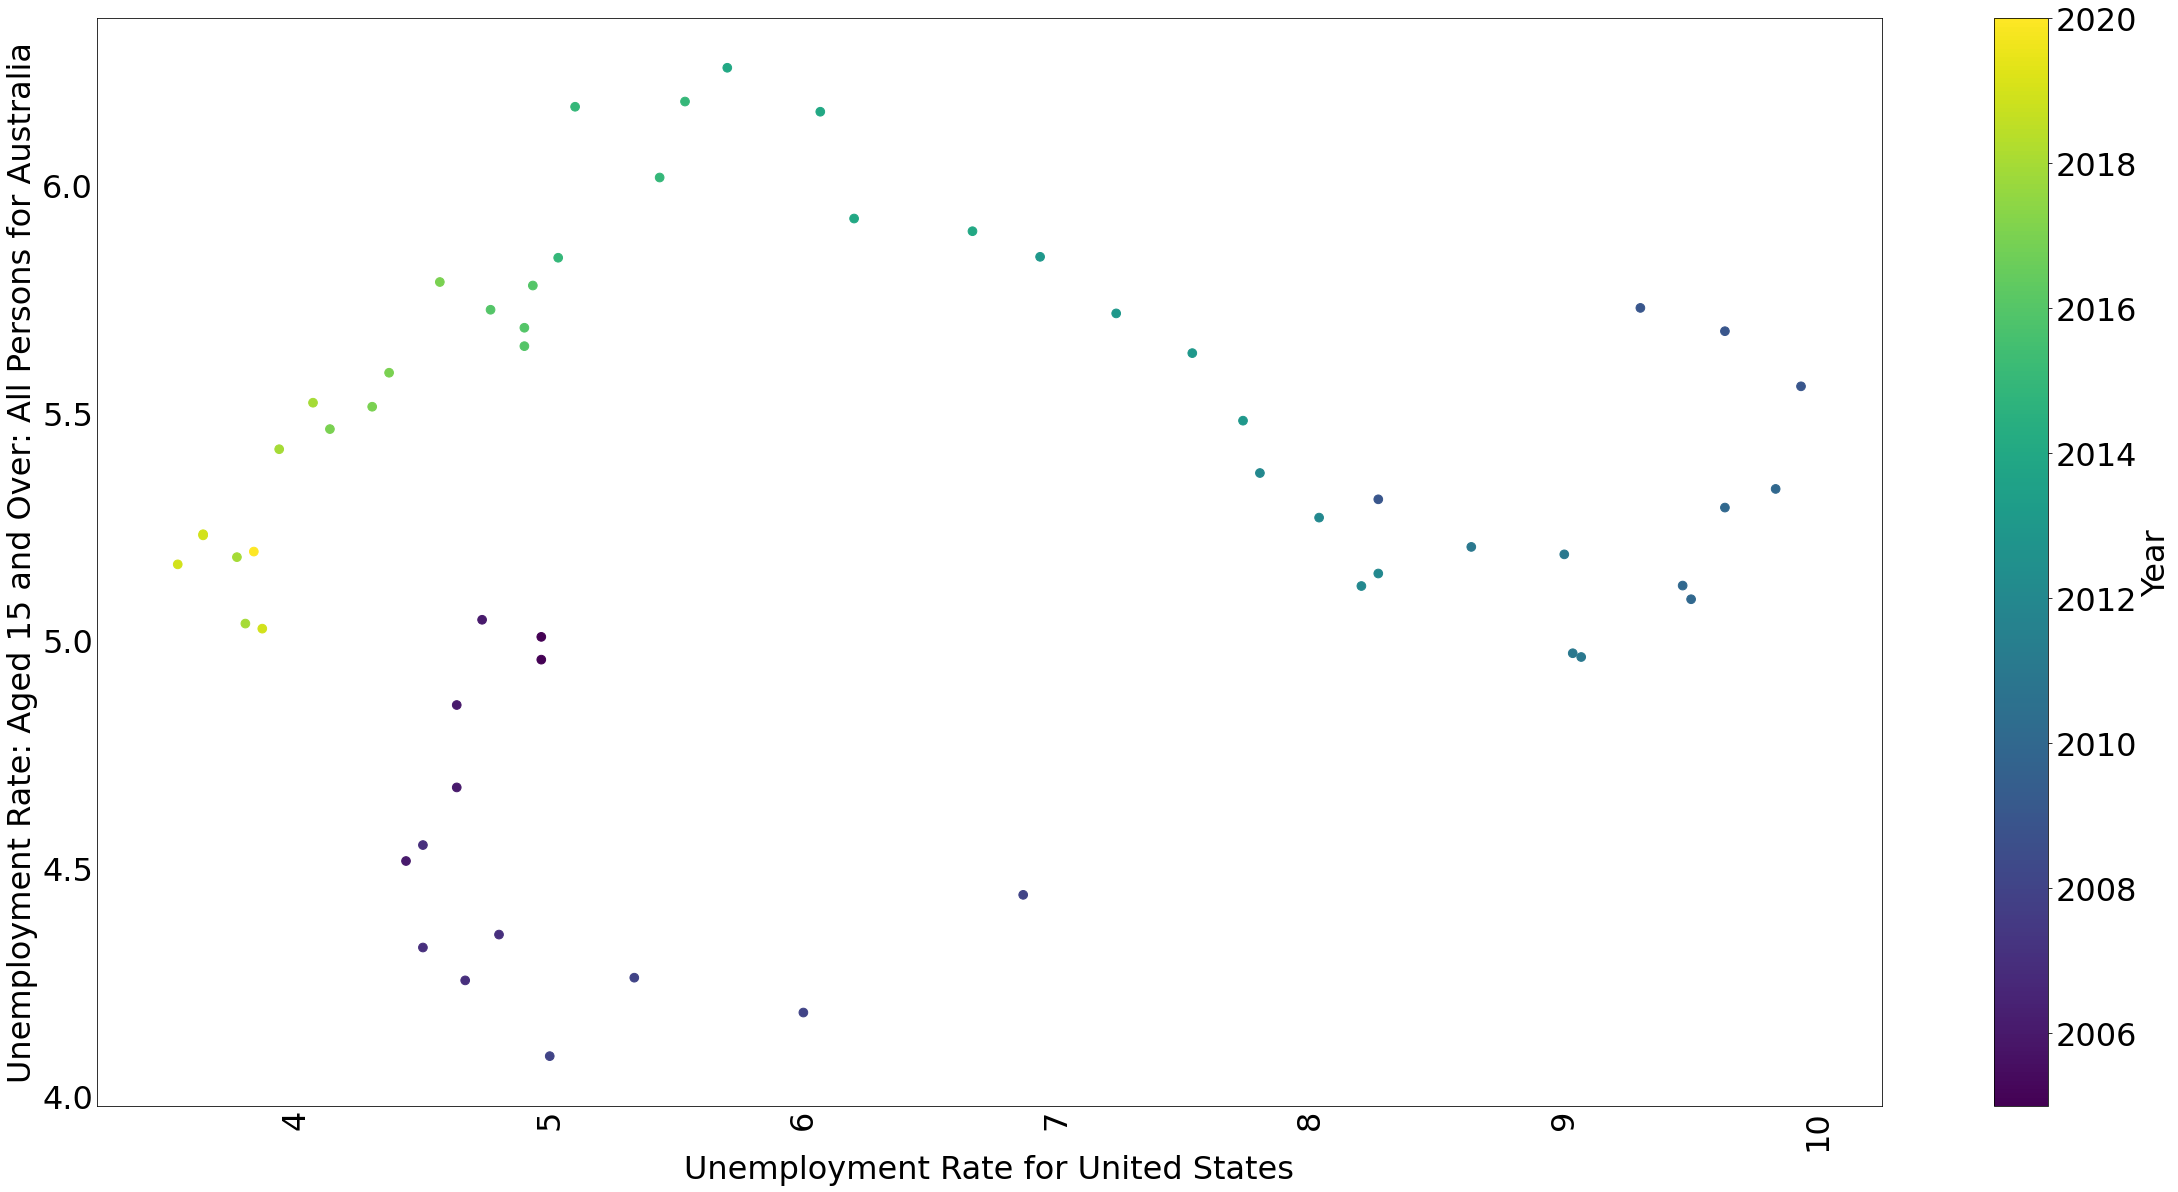

In [8]:
plt.rcParams.update({"font.size":32})
plot_ts_scatter(data)

In [9]:
data_codes = {"Gross Domestic Product":"GDP",
              "Real Gross Domestic Product":"GDPC1"
             }
start = datetime.datetime(1950, 7, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "Q")

data

,Gross Domestic Product,Real Gross Domestic Product
DATE,,
1950-09-30,308.153,2338.514
1950-12-31,319.945,2383.291
1951-03-31,336.000,2415.660
1951-06-30,344.090,2457.517
1951-09-30,351.385,2508.166
...,...,...
2019-06-30,21329.877,19020.599
2019-09-30,21540.325,19141.744
2019-12-31,21747.394,19253.959


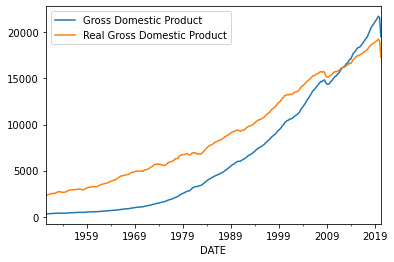

In [10]:
plt.rcParams.update({"font.size":10})
data.plot.line()

WHAT DOES THIS CROSS MEAN EXPLAIN IT

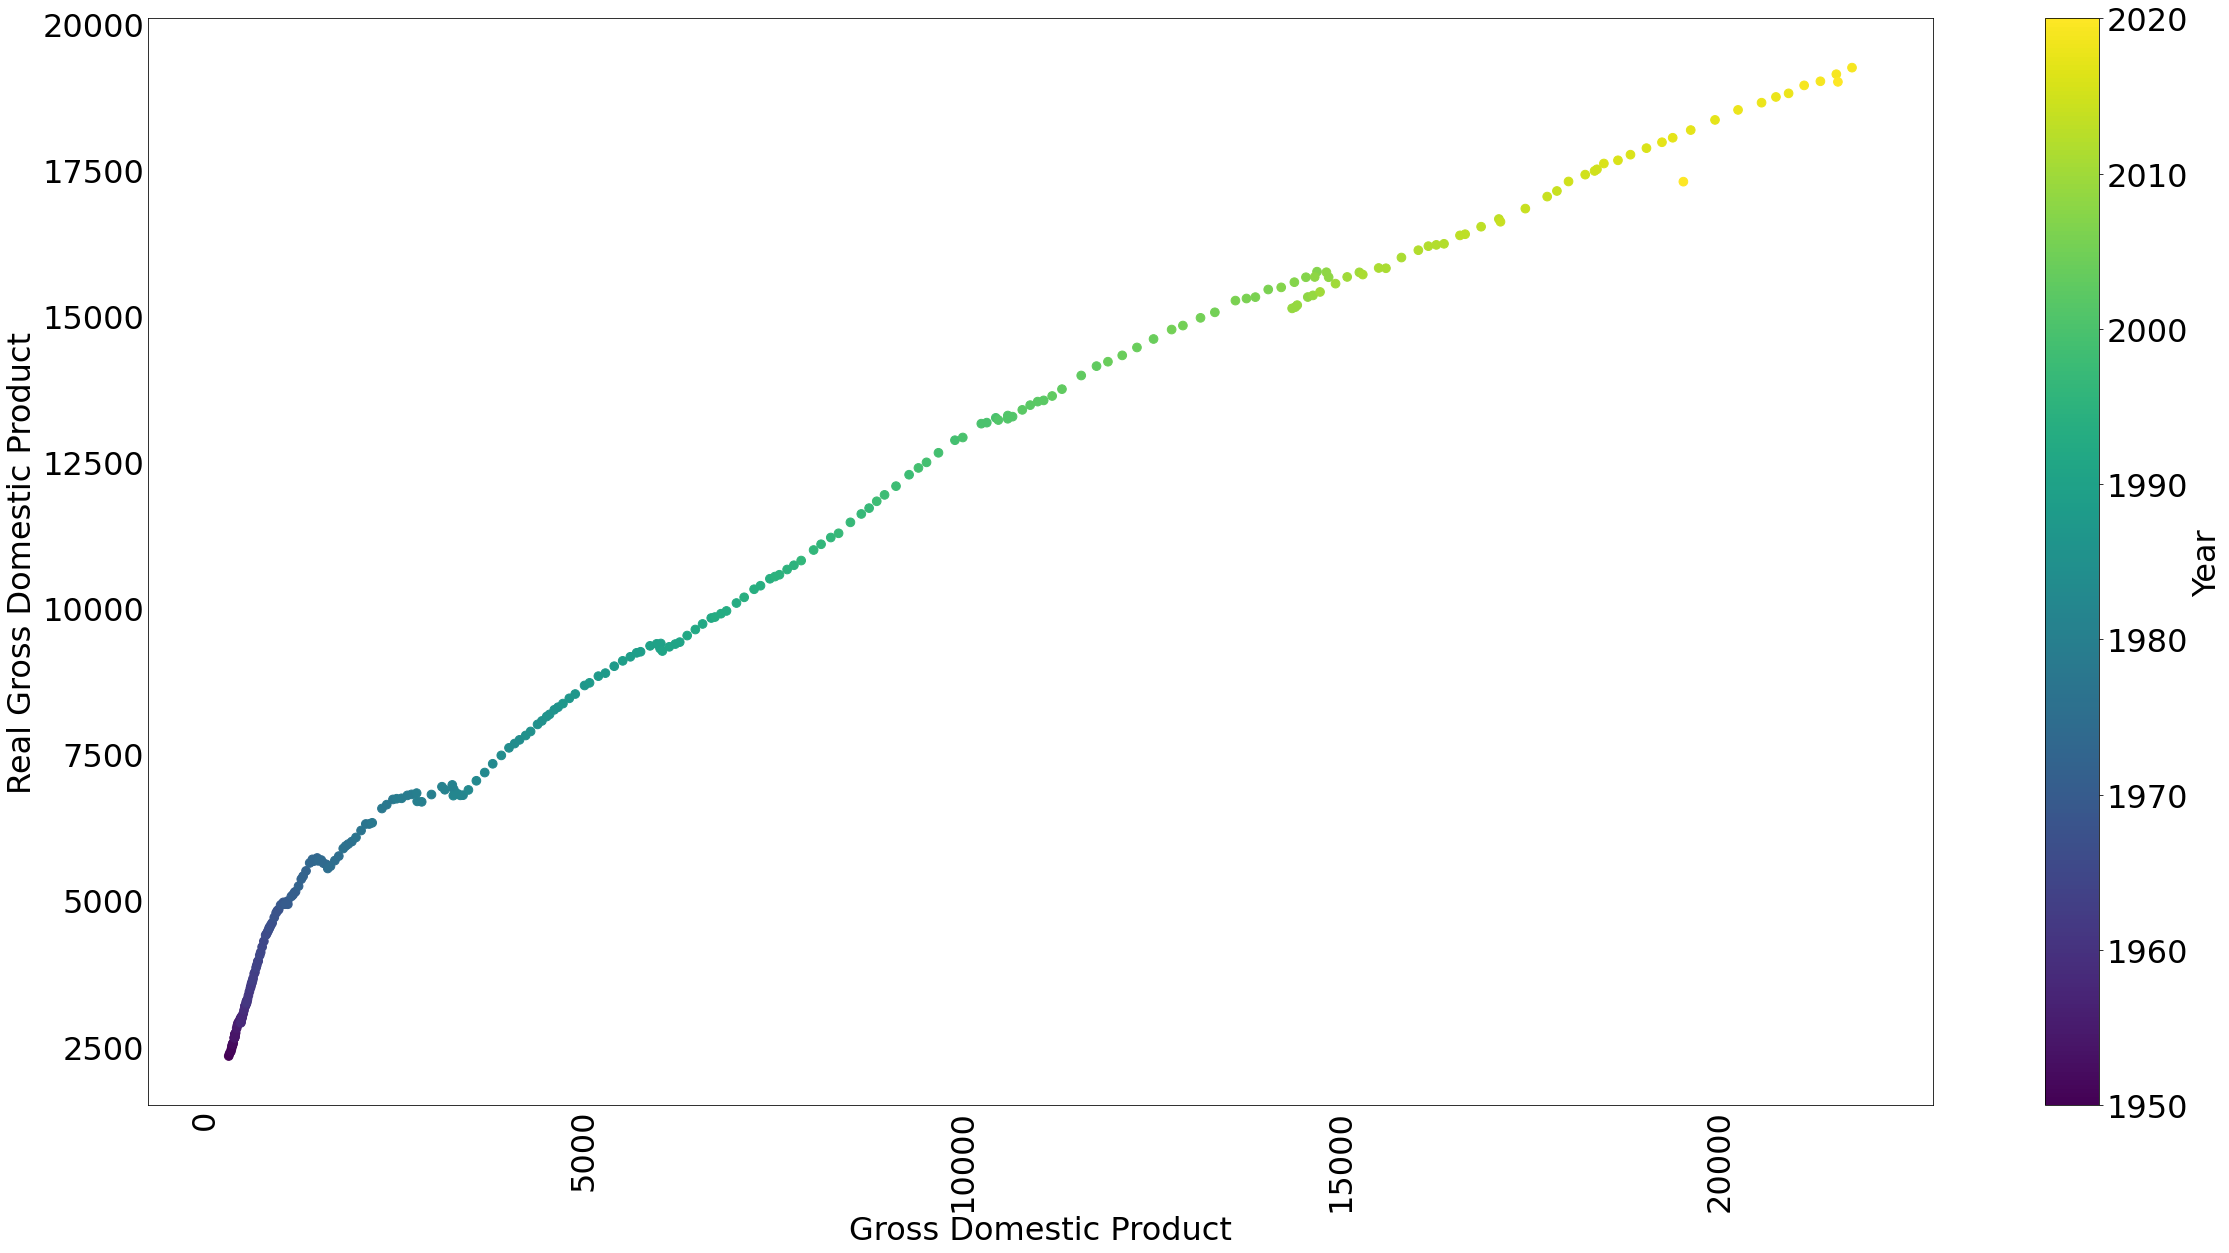

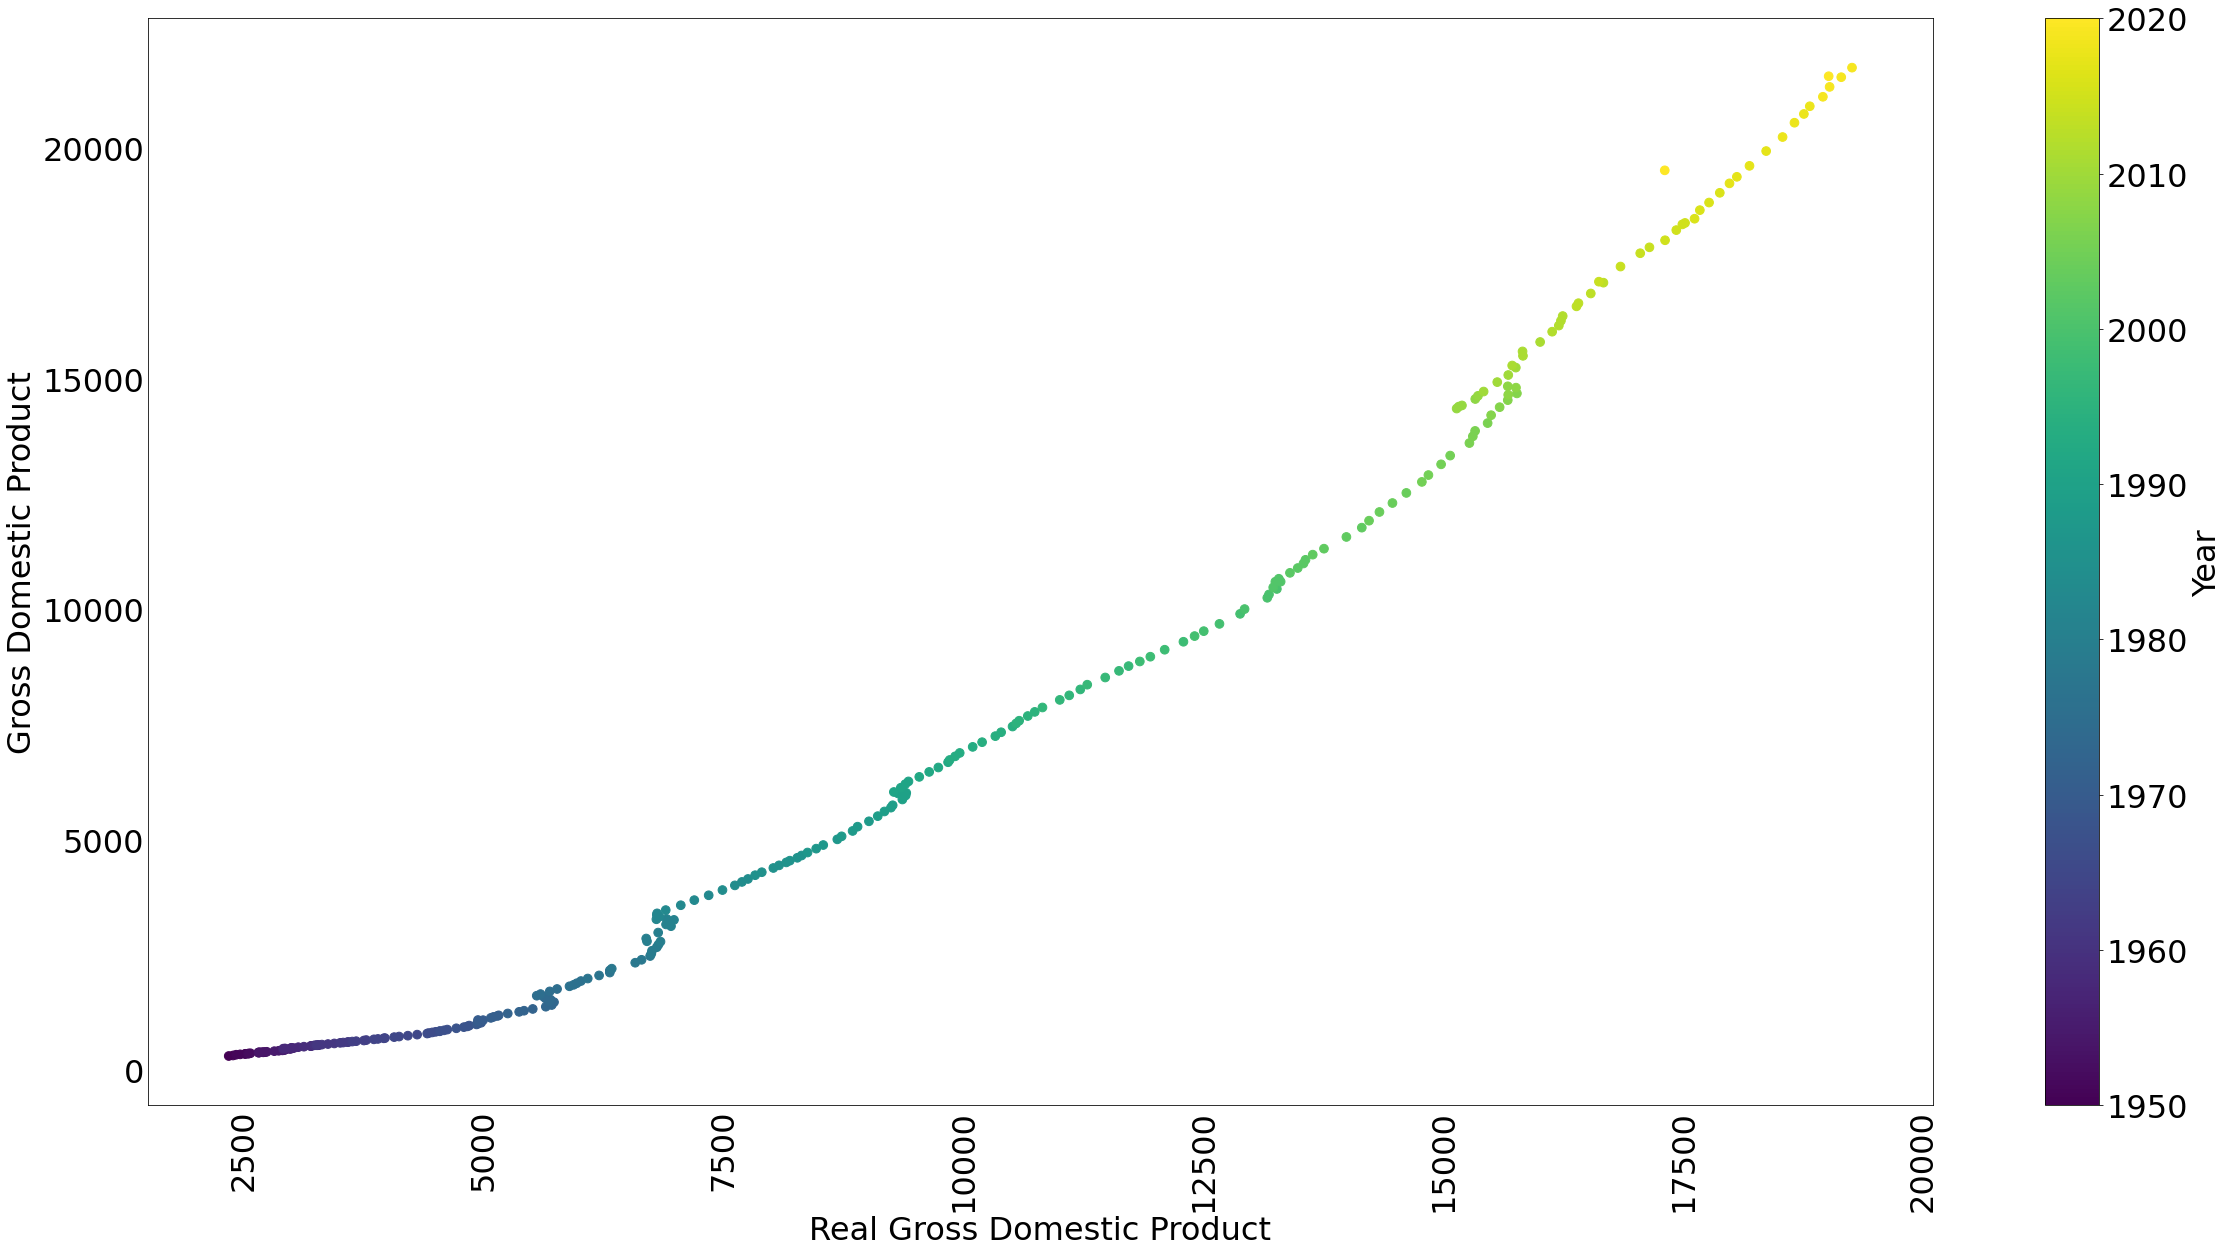

In [11]:
plt.rcParams.update({"font.size":32})
plot_ts_scatter(data)

# #2

In [12]:
data_codes = {"Gross Domestic Product":"GDP",
              "Real Gross Domestic Product":"GDPC1",
               "Consumer Price Index: Total All Items for the United States":"CPALTT01USM657N"
             }
start = datetime.datetime(1950, 7, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "M")

data

,Gross Domestic Product,Real Gross Domestic Product,Consumer Price Index: Total All Items for the United States
DATE,,,
1950-07-31,308.153,2338.514,NaN
1950-08-31,NaN,NaN,NaN
1950-09-30,NaN,NaN,NaN
1950-10-31,319.945,2383.291,NaN
1950-11-30,NaN,NaN,NaN
...,...,...,...
2019-12-31,NaN,NaN,-0.090977
2020-01-31,21561.139,19010.848,0.387977
2020-02-29,NaN,NaN,0.274062


In [13]:
# homework4import.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datlib.stats import *


data = pd.ExcelFile("homework4data.xlsx")#, sheet_name="Full data", index_col = [0,2])
names = list(data.sheet_names)
data_dct = {}

for name in names:
    #save sheet in dictionary under same name
     data_dct[name] = data.parse(name, index_col="Date")
     
     # problem: dataframe values are strings
     # solution: for each column, transfomr using pd.to_numeric
     for col, val in data_dct[name].items():
         # for each column - col - in the dataframe save under data_dct[name],
         # transform all values to numeric values. erorrs will return np.nan
         data_dct[name][col] = pd.to_numeric(val, errors = "coerce")         
print(data_dct)



for name in names:
    
    stats_dict = {}
    cov_dict = {}
    corr_dict = {}
    # drop null values or else statistics return nan result
    df = data_dct[name].dropna()
    # call column name in df for statistics that only require one variable
    for key1 in df:
        vec1 = df[key1]
        stats_dict[key1] = {}
        stats_dict[key1]["mean"] = mean(vec1)
        stats_dict[key1]["median"] = median(vec1)
        stats_dict[key1]["variance"] = variance(vec1)
        stats_dict[key1]["standard deviation"] = SD(vec1, sample = True)
        stats_dict[key1]["skewness"] = skewness(vec1, sample = True)
        stats_dict[key1]["kurtosis"] = kurtosis(vec1, sample = True)
        cov_dict[key1] = {}
        corr_dict[key1] = {}
        # call column from df for each cov/corr statistic
        for key2 in df:
            vec2 = df[key2]
            cov_dict[key1][key2] =covariance(vec1, vec2, sample = True)
            corr_dict[key1][key2] = correlation(vec1, vec2)
            
    #convert stats, cov, and corr dictionaries to pandas DataFrames
    stats_DF = pd.DataFrame(stats_dict)
    cov_DF = pd.DataFrame(cov_dict).sort_index(axis = 1)
    corr_DF = pd.DataFrame(corr_dict).sort_index(axis = 1)
    
    
    #output DataFrames to CSV
    stats_DF.to_csv(name + "stats.csv")
    cov_DF.to_csv(name + "covMatrix.csv")
    corr_DF.to_csv(name + "corrMatrix.csv")

{'FRED Graph':             Real GDP (GDPC1)  Nominal GDP (GDP)  Consumer Price Index  \
Date                                                                    
1960-01-01          3275.757            542.648             -0.340136   
1960-04-01          3258.088            541.080              0.340136   
1960-07-01          3274.029            545.604              0.000000   
1960-10-01          3232.009            540.197              0.675676   
1961-01-01          3253.826            545.018              0.000000   
...                      ...                ...                   ...   
2019-04-01         19020.599          21329.877              0.529500   
2019-07-01         19141.744          21540.325              0.167094   
2019-10-01         19253.959          21747.394              0.228619   
2020-01-01         19010.848          21561.139              0.387977   
2020-04-01         17302.511          19520.114             -0.668694   

            Currency in Circulation

Since we created a correlMatrix using Spyder, we can make a heatmap in exactly the same format by using subplots and the previous matrix. 

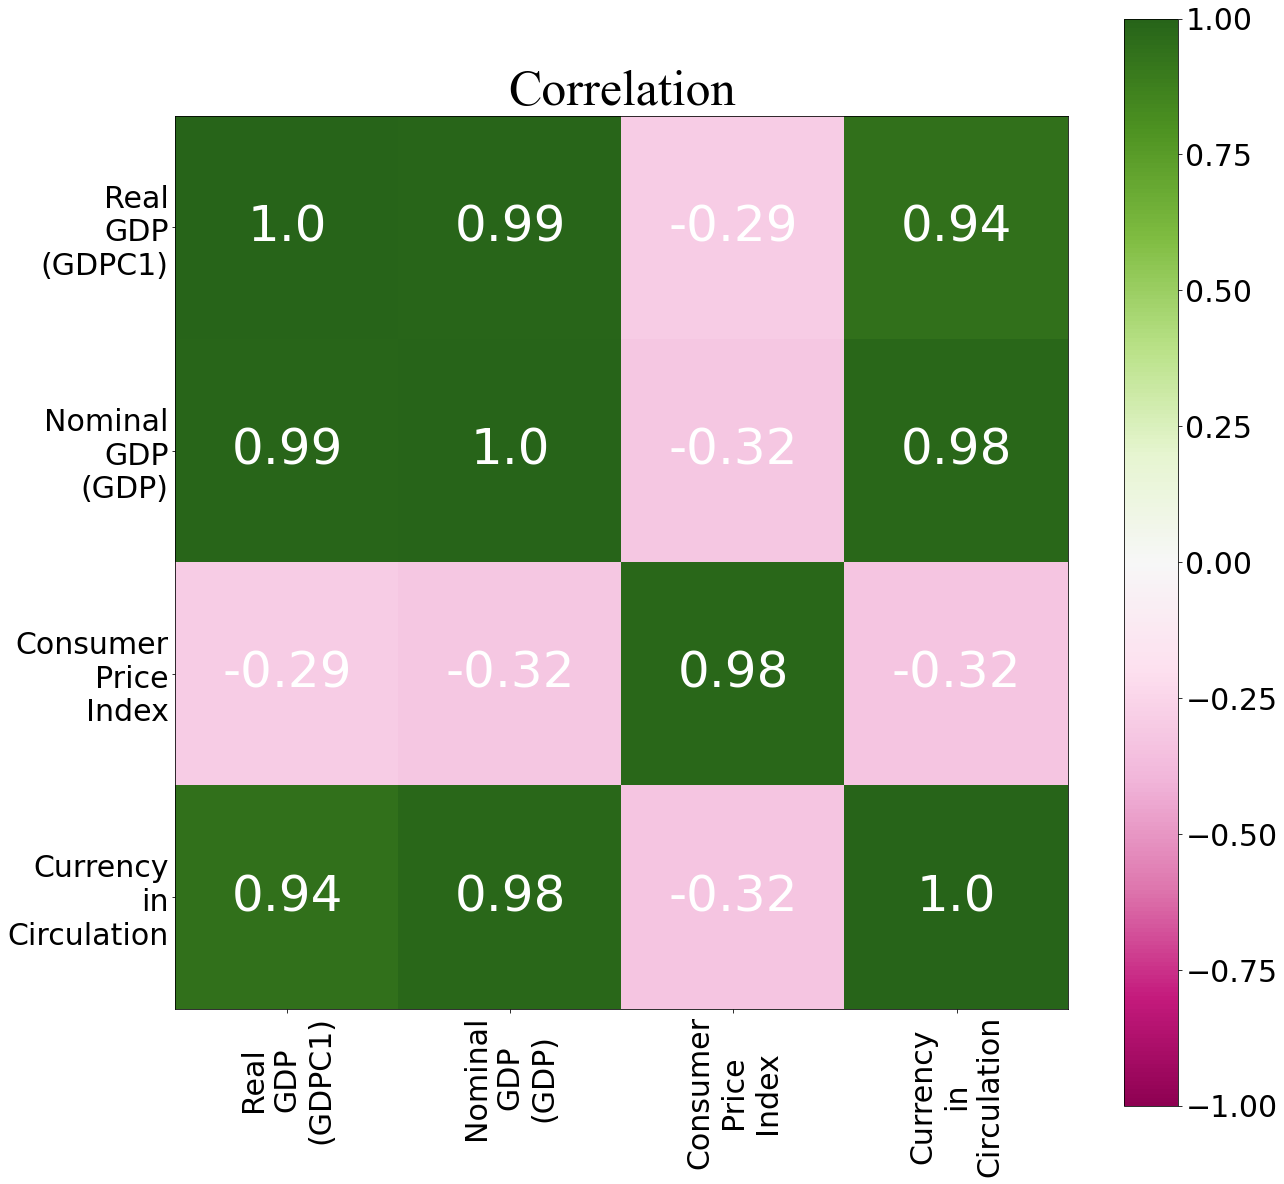

In [26]:
from matplotlib.backends.backend_pdf import PdfPages


def corr_matrix_heatmap(data, pp):  
    #Create a figure to visualize a corr matrix  
    fig, ax = plt.subplots(figsize=(20,20))  
    # use ax.imshow() to create a heatmap of correlation values  
    # seismic mapping shows negative values as blue and positive values as red  
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "PiYG")  
    # create a list of labels, stacking each word in a label by replacing " "  
    # with "\n"  
    labels = data.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    # adjust font size according to the number of variables visualized  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    # prepare space for label of each column  
    x_ticks = np.arange(num_vars)  
    # select labels and rotate them 90 degrees so that they are vertical  
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)  
    # prepare space for label of each row  
    y_ticks = np.arange(len(labels))  
    # select labels  
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    # show values in each tile of the heatmap  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")  
    #Create title with Times New Roman Font  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    #Call scale to show value of colors 
    cbar = fig.colorbar(im)
    plt.show()
    pp.savefig(fig, bbox_inches="tight")
    plt.close()

pp = PdfPages("Gwen Homework 4.pdf")


corr_data = pd.read_csv("FRED GraphcorrMatrix.csv", index_col = [0])
select_corr_data = corr_data.loc[scatter_cats][scatter_cats]
corr_matrix_heatmap(select_corr_data, pp)

In [14]:
data = pd.read_csv("homework4data.csv", index_col = ["Date"])
scatter_cats = ["Real GDP (GDPC1)", "Nominal GDP (GDP)", "Consumer Price Index", "Currency in Circulation"]
select_data = data[scatter_cats]

data_pct_change = df.pct_change(periods = 4)
print(data_pct_change)

            Real GDP (GDPC1)  Nominal GDP (GDP)  Consumer Price Index  \
Date                                                                    
1960-01-01               NaN                NaN                   NaN   
1960-04-01               NaN                NaN                   NaN   
1960-07-01               NaN                NaN                   NaN   
1960-10-01               NaN                NaN                   NaN   
1961-01-01         -0.006695           0.004367             -1.000000   
...                      ...                ...                   ...   
2019-04-01          0.019632           0.037816              0.332045   
2019-07-01          0.020765           0.038452             23.768171   
2019-10-01          0.023389           0.040055              0.293999   
2020-01-01          0.003193           0.021114              1.034919   
2020-04-01         -0.090328          -0.084846             -2.262878   

            Currency in Circulation  
Date        

In [15]:
data_pct_change = df.pct_change(periods = 4).to_csv('year_over_year_pct_change2.csv', index = True)
print('\nCSV String:\n', data_pct_change)


CSV String:
 None


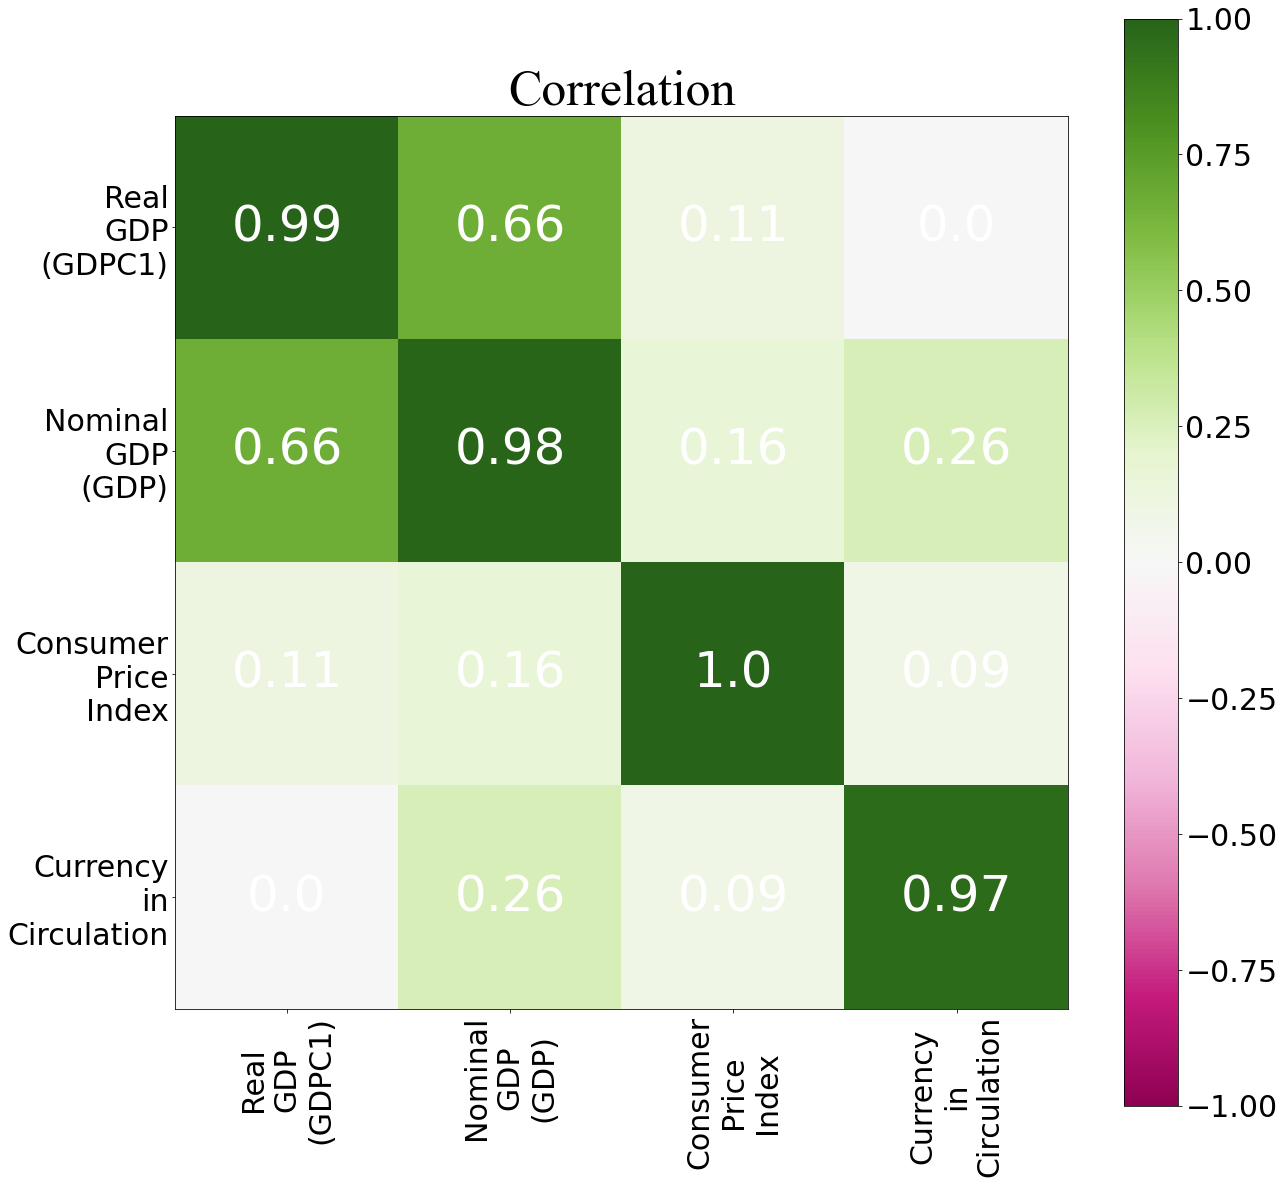

In [38]:

def corr_matrix_heatmap(data, pp):  
    #Create a figure to visualize a corr matrix  
    fig, ax = plt.subplots(figsize=(20,20))  
    # use ax.imshow() to create a heatmap of correlation values  
    # seismic mapping shows negative values as blue and positive values as red  
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "PiYG")  
    # create a list of labels, stacking each word in a label by replacing " "  
    # with "\n"  
    labels = data.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    # adjust font size according to the number of variables visualized  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    # prepare space for label of each column  
    x_ticks = np.arange(num_vars)  
    # select labels and rotate them 90 degrees so that they are vertical  
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)  
    # prepare space for label of each row  
    y_ticks = np.arange(len(labels))  
    # select labels  
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)  
    # show values in each tile of the heatmap  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")  
    #Create title with Times New Roman Font  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    #Call scale to show value of colors 
    cbar = fig.colorbar(im)
    plt.show()
    pp.savefig(fig, bbox_inches="tight")
    plt.close()

pp = PdfPages("Gwen Homework 4.pdf")


corr_data = pd.read_csv("year_over_year_pct_change2corrMatrix.csv", index_col = [0])
select_corr_data = corr_data.loc[scatter_cats][scatter_cats]
corr_matrix_heatmap(select_corr_data, pp)

In the previous heatmap of just raw variable data rather than rate of change, Real GDP, Nominal GDP, and Currency in circulation are all *almost* correlated at a perfect value of 1. This could be because these variables move in close tandem with each other. As money in the market grows, so does Nominal GDP, and Real GDP is just Nominal GDP ajusted for inflation. Interestingly, Consumer Price Index is negatively correlated with every other variable. The CPI represents the increased cost in the average basket of goods for the American family. 

Rates of change for Currency in circulation and Real GDP have absolutely no correlation according to the calculations. This means that an increase or decrease in the level of the money supply does not in any way mean the Real GDP rate of change will follow. This makes logical sense because Real GDP is adjusted for inflation and therefore its rate of change would not represent the rate of change of the inflation caused by an increasing money supply. It's important to note that they aren't negatively correlated, just neutral. Nominal GDP and Real GDP's rate of change are 66% percent correlated meaning if say Nominal rate of change increases by 1 unit, it's 66% likely that that Real GDP increases by the same or changes in the same direction. Nominal GDP and currency in circulation have a small, positive correlation, and CPI has a positive but small relationship with currency in circulation, Nominal GDP, and Real GDP. This is likely because the CPI is meant to identify the cost of living that has increased with inflation and GDP expansion, so it's rate of change would follow the rate of change of the other variables.

<ipython-input-39-8bd0f319da5e>:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(data,alpha = .5, s = 108 / num_vars, ax=ax)


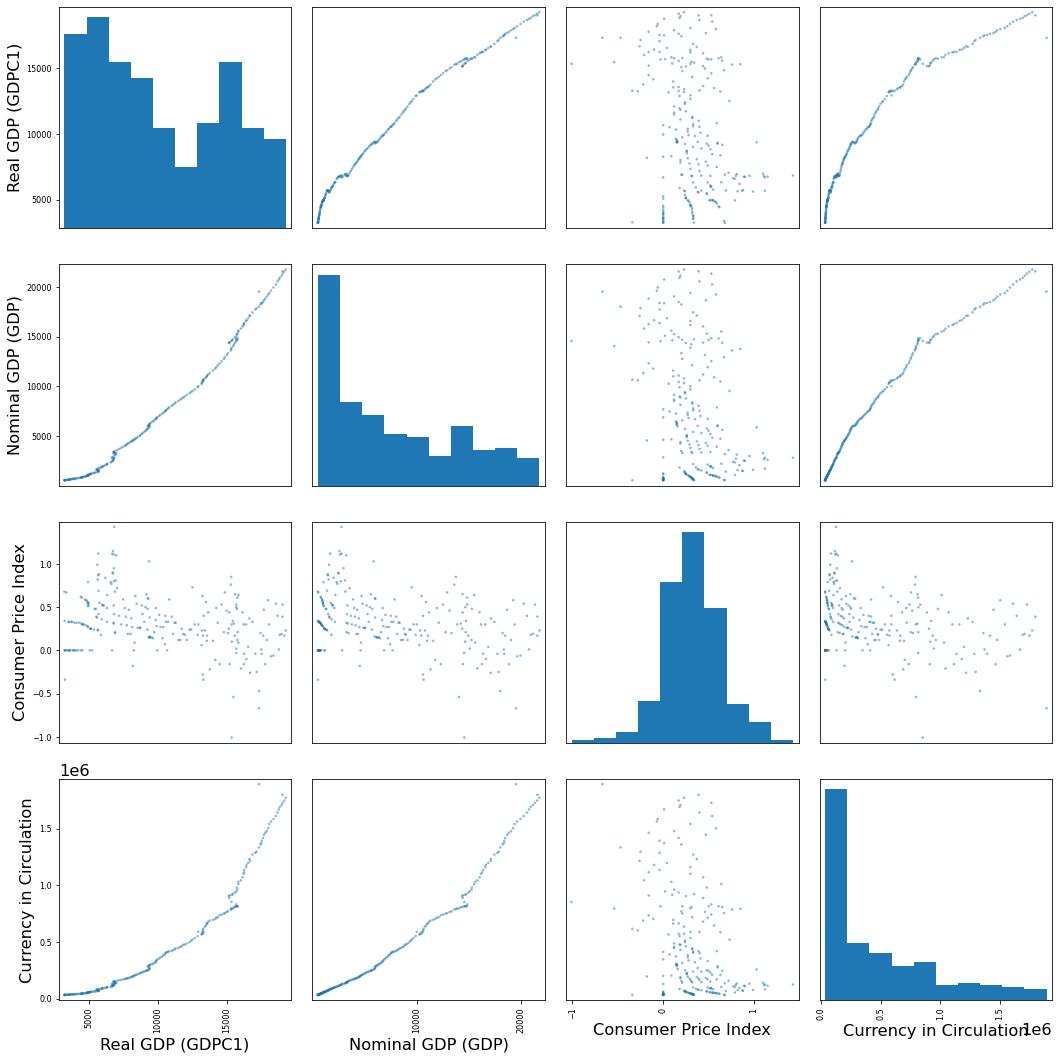

In [39]:
def formatted_scatter_matrix(data, pp):  

    fig_len = 15  
    fig, ax = plt.subplots(figsize = ((fig_len, fig_len)))  

    num_vars = len(data.keys())  
    fontsize = 65 / num_vars  
    plt.rcParams.update({'font.size': fontsize})  
    pd.plotting.scatter_matrix(data,alpha = .5, s = 108 / num_vars, ax=ax)  
    
    plt.tight_layout()  
    plt.show()  
    
    pp.savefig(fig, bbox_inches = "tight")  
    plt.close()  
    
formatted_scatter_matrix(select_data, pp)
pp.close()

# #3

gather_data and plot_ts_scatter have already been defined.

In [17]:
import matplotlib.transforms as mtransforms
import math

def plot_lines(df, title = False, linewidth = 1, figsize = (40,20), full_index = False, 
               h_line = False, max_y = False, legend = True, pp = None, show_inversion = False):
    fig, ax = plt.subplots(figsize = figsize)
    
    # if no secondary_y (axis), plot all variables at once
    df.plot.line(linewidth = linewidth, ax = ax, legend = legend)
    if h_line != False:
        ax.axhline(h_line, ls = "--", linewidth = 1.5, color = "k")
        
    # turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    
    # get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    if max_y != False:
        ax.set_ylim(bottom = 0, top = max_y)
    if full_index:
        plt.xticks([i for i in range(len(df.index))], list(df.index))
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals]) 

    # transform y-axis values from sci notation to integers
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals]) 
    if title != False:
        plt.title(title, fontsize = 72)

    if show_inversion:
        trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
        ax.fill_between(df.index, 0, df.max().max(), where=df["2 Y (%)"] < df["1 M (%)"],
                    facecolor='red', alpha=0.2, transform = trans)
        
    # format image filename 
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")
    plt.savefig(filename[:50] + " line.png",
                bbox_inches = "tight")
    
    #[:50] + " line.png"
    # save image if PdfPages object was passed
    if pp != None: pp.savefig(fig, bbox_inches = "tight")

def plot_stacked_lines(df, plot_vars, linewidth = 1, figsize = (40,20), 
                       pp = None, total_var = False):
    fig, ax = plt.subplots(figsize = figsize)
#    mpl_colors = ["C" + str(i) for i in range(11)]
    df[plot_vars].plot.area(stacked = True, linewidth = linewidth,
                            ax = ax)
    if total_var != False:
        df[total_var].plot.line(linewidth = linewidth, ax = ax, c = "k",
              label = total_var, ls = "--")
    ax.legend(loc=2, ncol = 2)

In [18]:
data_codes  = {"1 Y (%)": "DGS1",
               "2 Y (%)": "DGS2",
               "5 Y (%)": "DGS5",
               "10 Y (%)": "DGS10",
               "30 Y (%)": "DGS30"}
               
# start and end dates
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes, start = start, end = end, freq = "M").dropna()
data["30 Y - 1 Y"] = data["30 Y (%)"].sub(data["1 Y (%)"])


In [27]:
data.iloc[:15]

,1 Y (%),2 Y (%),5 Y (%),10 Y (%),30 Y (%),30 Y - 1 Y
DATE,,,,,,
2000-01-31,6.121500,6.440000,6.579500,6.661000,6.625500,0.504000
2000-02-29,6.218000,6.610500,6.678000,6.519500,6.232000,0.014000
2000-03-31,6.222174,6.528261,6.503913,6.256522,6.053478,-0.168696
2000-04-30,6.150526,6.403684,6.262632,5.990526,5.846316,-0.304211
2000-05-31,6.326364,6.809545,6.687727,6.440455,6.148636,-0.177727
2000-06-30,6.172727,6.481818,6.300909,6.097273,5.926364,-0.246364
2000-07-31,6.082500,6.339000,6.179000,6.054000,5.851000,-0.231500
2000-08-31,6.183043,6.228696,6.060870,5.826087,5.716087,-0.466957
2000-09-30,6.125500,6.081500,5.934500,5.799000,5.826500,-0.299000


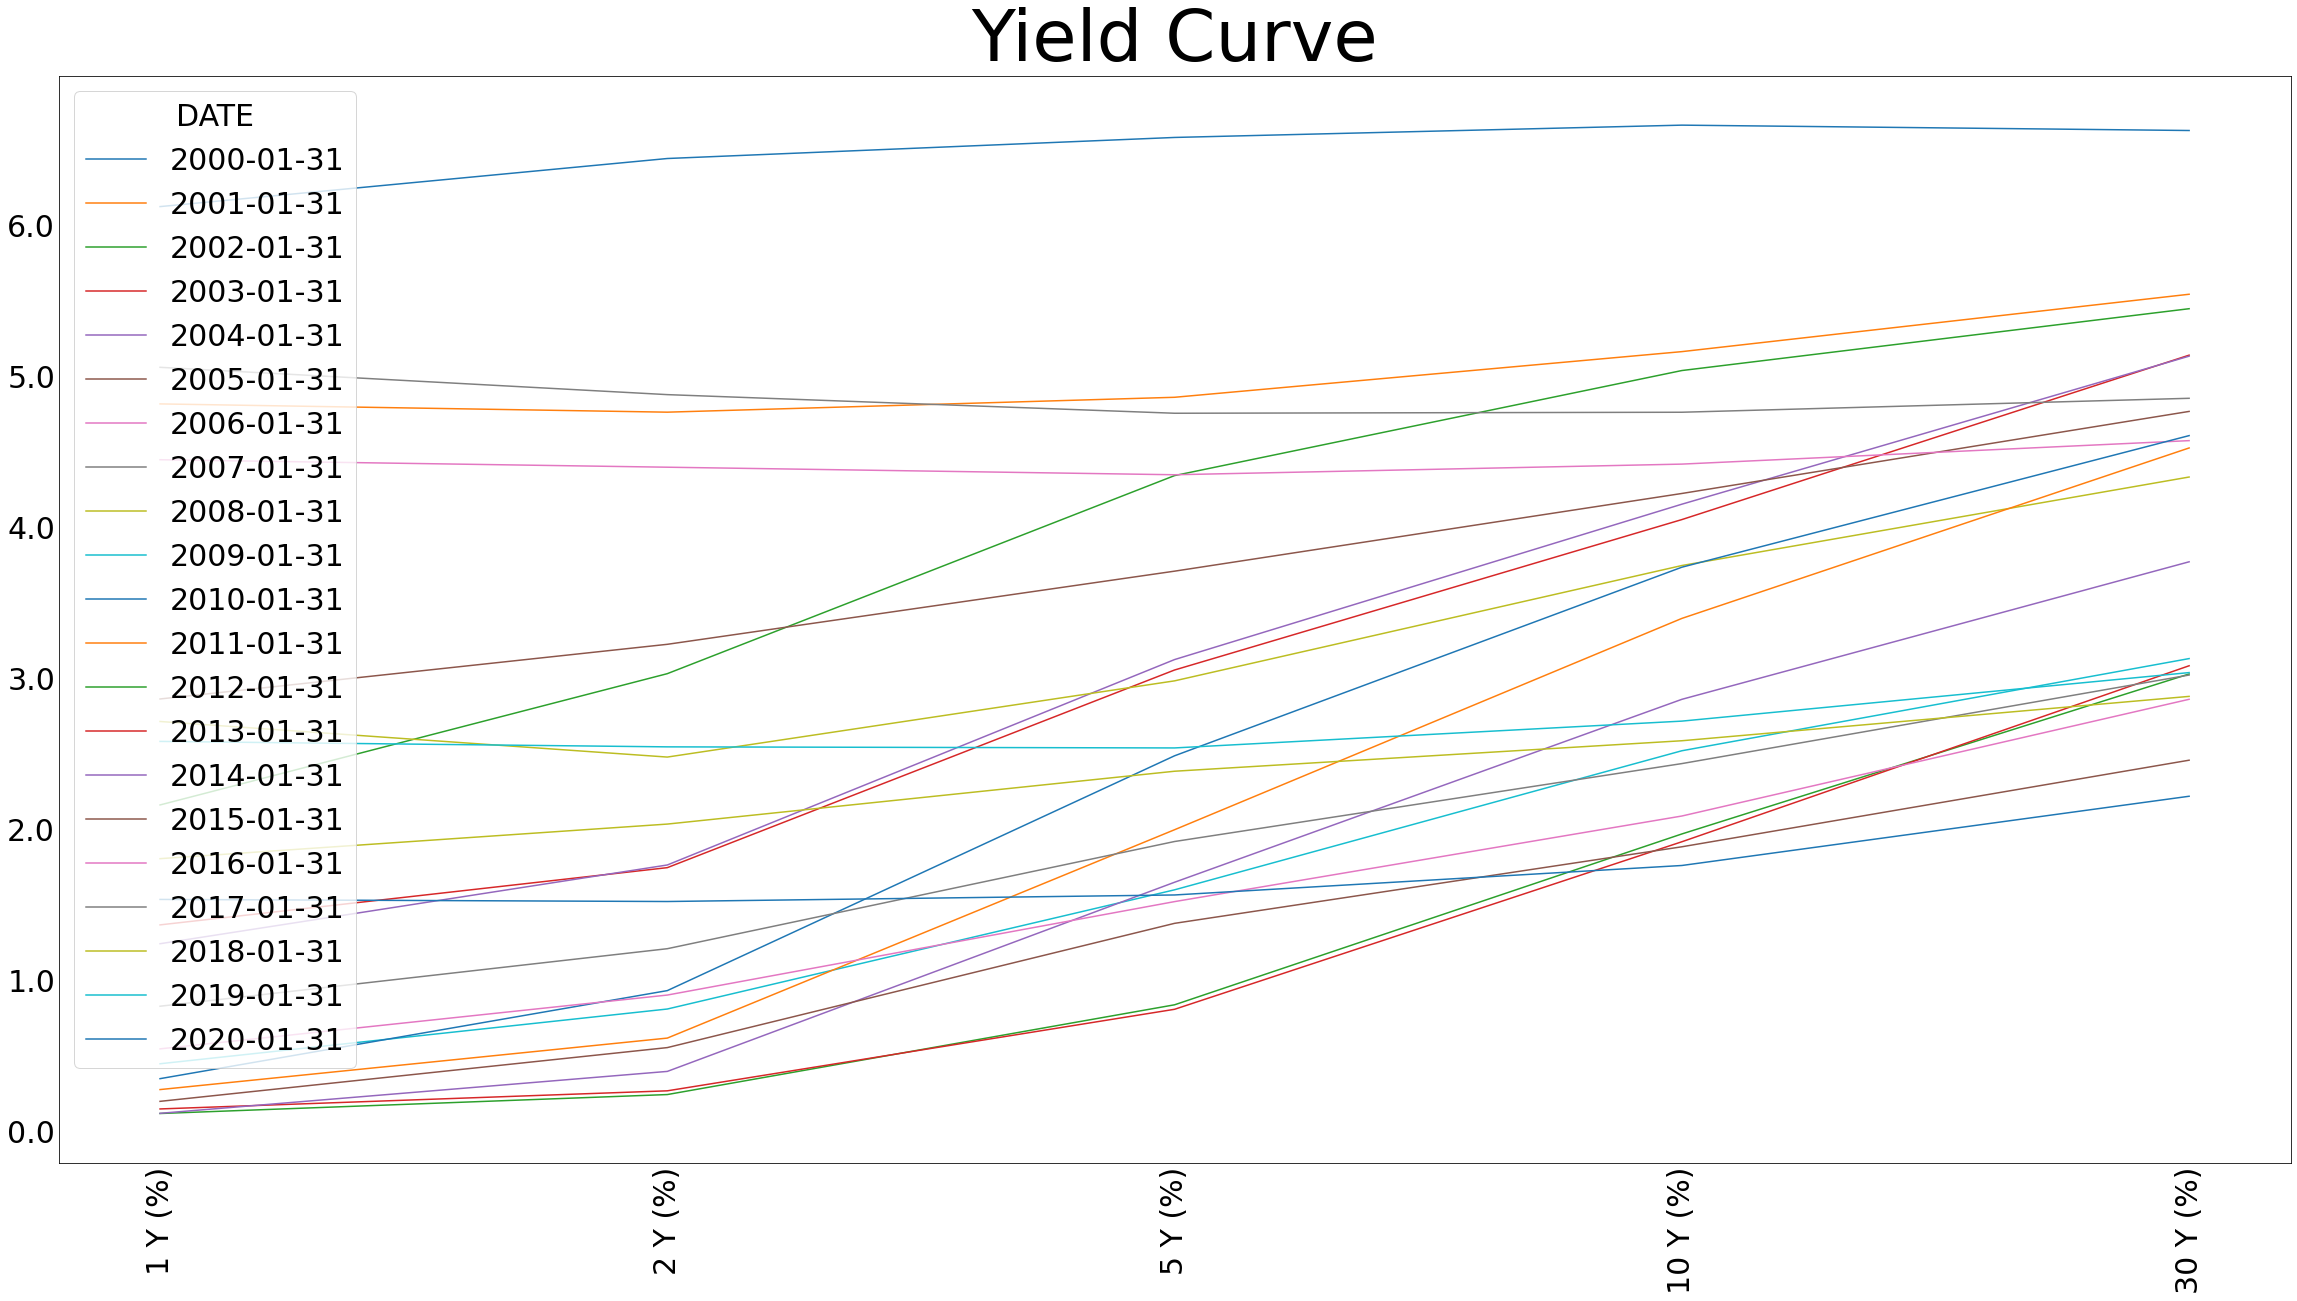

In [28]:
T_data = data.T
T_data.rename(columns={name : str(name)[:10] for name in T_data.keys()}, inplace = True)
keys = list(T_data.keys())

# plot all maturities, remove "30 Y - 1 M" dataframe
T_data_trunc = T_data[keys[::12]].drop("30 Y - 1 Y")
max_y = T_data.max().max()

# for key, val in T_data_trunc.items():
plot_lines(df = T_data_trunc, title = "Yield Curve", linewidth = 1.5, figsize = (40, 20), full_index = True, pp = None)

In [132]:
from matplotlib.animation import FuncAnimation
import math         
def plot_curves(date, *kwargs):
    #ax.clear()
    ax.set_ylim(bottom = 0, top = max_y)
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals])
 
    # the FuncAnimation cycles from 0 to i frames,
    plot_df = df[date]
    alpha = 1 if date in write_dates else .1
    color = "C" + str(math.ceil(int(date[5:7])/3)) if date != write_dates[0] else "k"

    # If no secondary_y (axis), plot all variables at once

    plot_df.plot.line(linewidth = linewidth, ax = ax, alpha = alpha, color = color)
    if date in write_dates: 
        plt.text(len(plot_df.keys()) - 1, plot_df["30 Y (%)"], date[5:], color = color)
    # Turn the text on the x-axis so that it reads vertically
    ax.tick_params(axis='x', rotation=90)
    ax.set_title(str(date)[:10] + "\n" + "Yield Curve (U.S. Treasuries)", fontsize = 30)
    print(date)
    
def init(*kwargs):
    # Get rid of tick lines perpendicular to the axis for aesthetic
    ax.tick_params('both', length=0, which='both')
    plt.xticks([i for i in range(len(data.index))], list(data.index))
    ax.tick_params(axis='x', rotation=90)
    # transform y-axis values from sci notation to integers
    ax.set_ylim(bottom = 0, top = max_y)
    vals = ax.get_yticks()
    ax.set_yticklabels([round(y,2) for y in vals])

dates = list(T_data.keys())[-166:]
write_dates = dates[-1:0:-20]
df = T_data[dates].drop("30 Y - 1 Y", axis = 0)
max_y = df.max().max()
fig, ax = plt.subplots(figsize=(40,20))   
plt.rcParams.update({"font.size": 30})
linewidth = 5
# the functions will unpack the tuple. The same names variable names
# are used in the function
kwargs = (df, fig, ax, max_y, linewidth, write_dates)
frames = dates
anim = FuncAnimation(fig, plot_curves, frames = frames, 
                     blit = False, init_func = init, interval=100, 
                     fargs =kwargs)
# Use the next line to save the video as an MP4.
anim.save("TreasuriesYieldCurve.gif", writer = "pillow")
plt.close()

2007-01-31
2007-02-28
2007-03-31
2007-04-30
2007-05-31
2007-06-30
2007-07-31
2007-08-31
2007-09-30
2007-10-31
2007-11-30
2007-12-31
2008-01-31
2008-02-29
2008-03-31
2008-04-30
2008-05-31
2008-06-30
2008-07-31
2008-08-31
2008-09-30
2008-10-31
2008-11-30
2008-12-31
2009-01-31
2009-02-28
2009-03-31
2009-04-30
2009-05-31
2009-06-30
2009-07-31
2009-08-31
2009-09-30
2009-10-31
2009-11-30
2009-12-31
2010-01-31
2010-02-28
2010-03-31
2010-04-30
2010-05-31
2010-06-30
2010-07-31
2010-08-31
2010-09-30
2010-10-31
2010-11-30
2010-12-31
2011-01-31
2011-02-28
2011-03-31
2011-04-30
2011-05-31
2011-06-30
2011-07-31
2011-08-31
2011-09-30
2011-10-31
2011-11-30
2011-12-31
2012-01-31
2012-02-29
2012-03-31
2012-04-30
2012-05-31
2012-06-30
2012-07-31
2012-08-31
2012-09-30
2012-10-31
2012-11-30
2012-12-31
2013-01-31
2013-02-28
2013-03-31
2013-04-30
2013-05-31
2013-06-30
2013-07-31
2013-08-31
2013-09-30
2013-10-31
2013-11-30
2013-12-31
2014-01-31
2014-02-28
2014-03-31
2014-04-30
2014-05-31
2014-06-30
2014-07-31

In [161]:
import datetime

data_codes  = {"1 Y (%)": "DGS1",
               "2 Y (%)": "DGS2",
               "5 Y (%)": "DGS5",
               "10 Y (%)": "DGS10",
               "30 Y (%)": "DGS30"}
               
# start and end dates
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes, start = start, end = end, freq = "Y").dropna()
data["30 Y - 1 Y"] = data["30 Y (%)"].sub(data["1 Y (%)"])


df = data

print(df)

             1 Y (%)   2 Y (%)   5 Y (%)  10 Y (%)  30 Y (%)  30 Y - 1 Y
DATE                                                                    
2000-12-31  6.112948  6.260916  6.157769  6.030279  5.940637   -0.172311
2001-12-31  3.490000  3.830887  4.556694  5.020685  5.494839    2.004839
2002-12-31  2.001880  2.637760  3.815720  4.613080  5.440720    3.438840
2003-12-31  1.241400  1.650600  2.966160  4.013880  5.109200    3.867800
2004-12-31  1.887680  2.381480  3.425960  4.271320  5.131920    3.244240
2005-12-31  3.620960  3.854560  4.046360  4.288880  4.560680    0.939720
2006-12-31  4.936240  4.818480  4.748760  4.795000  4.879520   -0.056720
2007-12-31  4.531235  4.364821  4.431594  4.634661  4.838287    0.307052
2008-12-31  1.826813  2.011315  2.803546  3.664263  4.277530    2.450717
2009-12-31  0.473520  0.958480  2.197800  3.264120  4.076680    3.603160
2010-12-31  0.317649  0.703347  1.930159  3.215060  4.251076    3.933426
2011-12-31  0.180880  0.449360  1.518240  2.781640 

In [163]:
df.loc[2000:2020]["1 Y (%)"]

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [2000] of <class 'int'>

In [169]:
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import matplotlib.pyplot as plt


x1 = df.loc[2000:2020]
y1 = "1 Y (%)"

x2 = df.loc[2000:2020]
y2 = "2 Y (%)"

x3 = df.loc[2000:2020]
y3 = "5 Y (%)"

x4 = df.loc[2000:2020]
y4 = "10 Y (%)"

x5 = df.loc[2000:2020]
y5 = "30 Y (%)"


pp = PdfPages('test.pdf')


def function_plot(x, y):
    plt.figure()
    plt.clf()

    plt.plot(x,y)
    plt.title("Yield Curve")
    plt.xlabel('x axis', fontsize = 13)
    plt.ylabel('y axis', fontsize = 13)
    pp.savefig()

function_plot(x1, y1)
function_plot(x2, y2)
function_plot(x3, y3)
function_plot(x4, y4)
function_plot(x5, y5)

pp.close()

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [2000] of <class 'int'>

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# #4

TypeError: cannot unpack non-iterable NoneType object

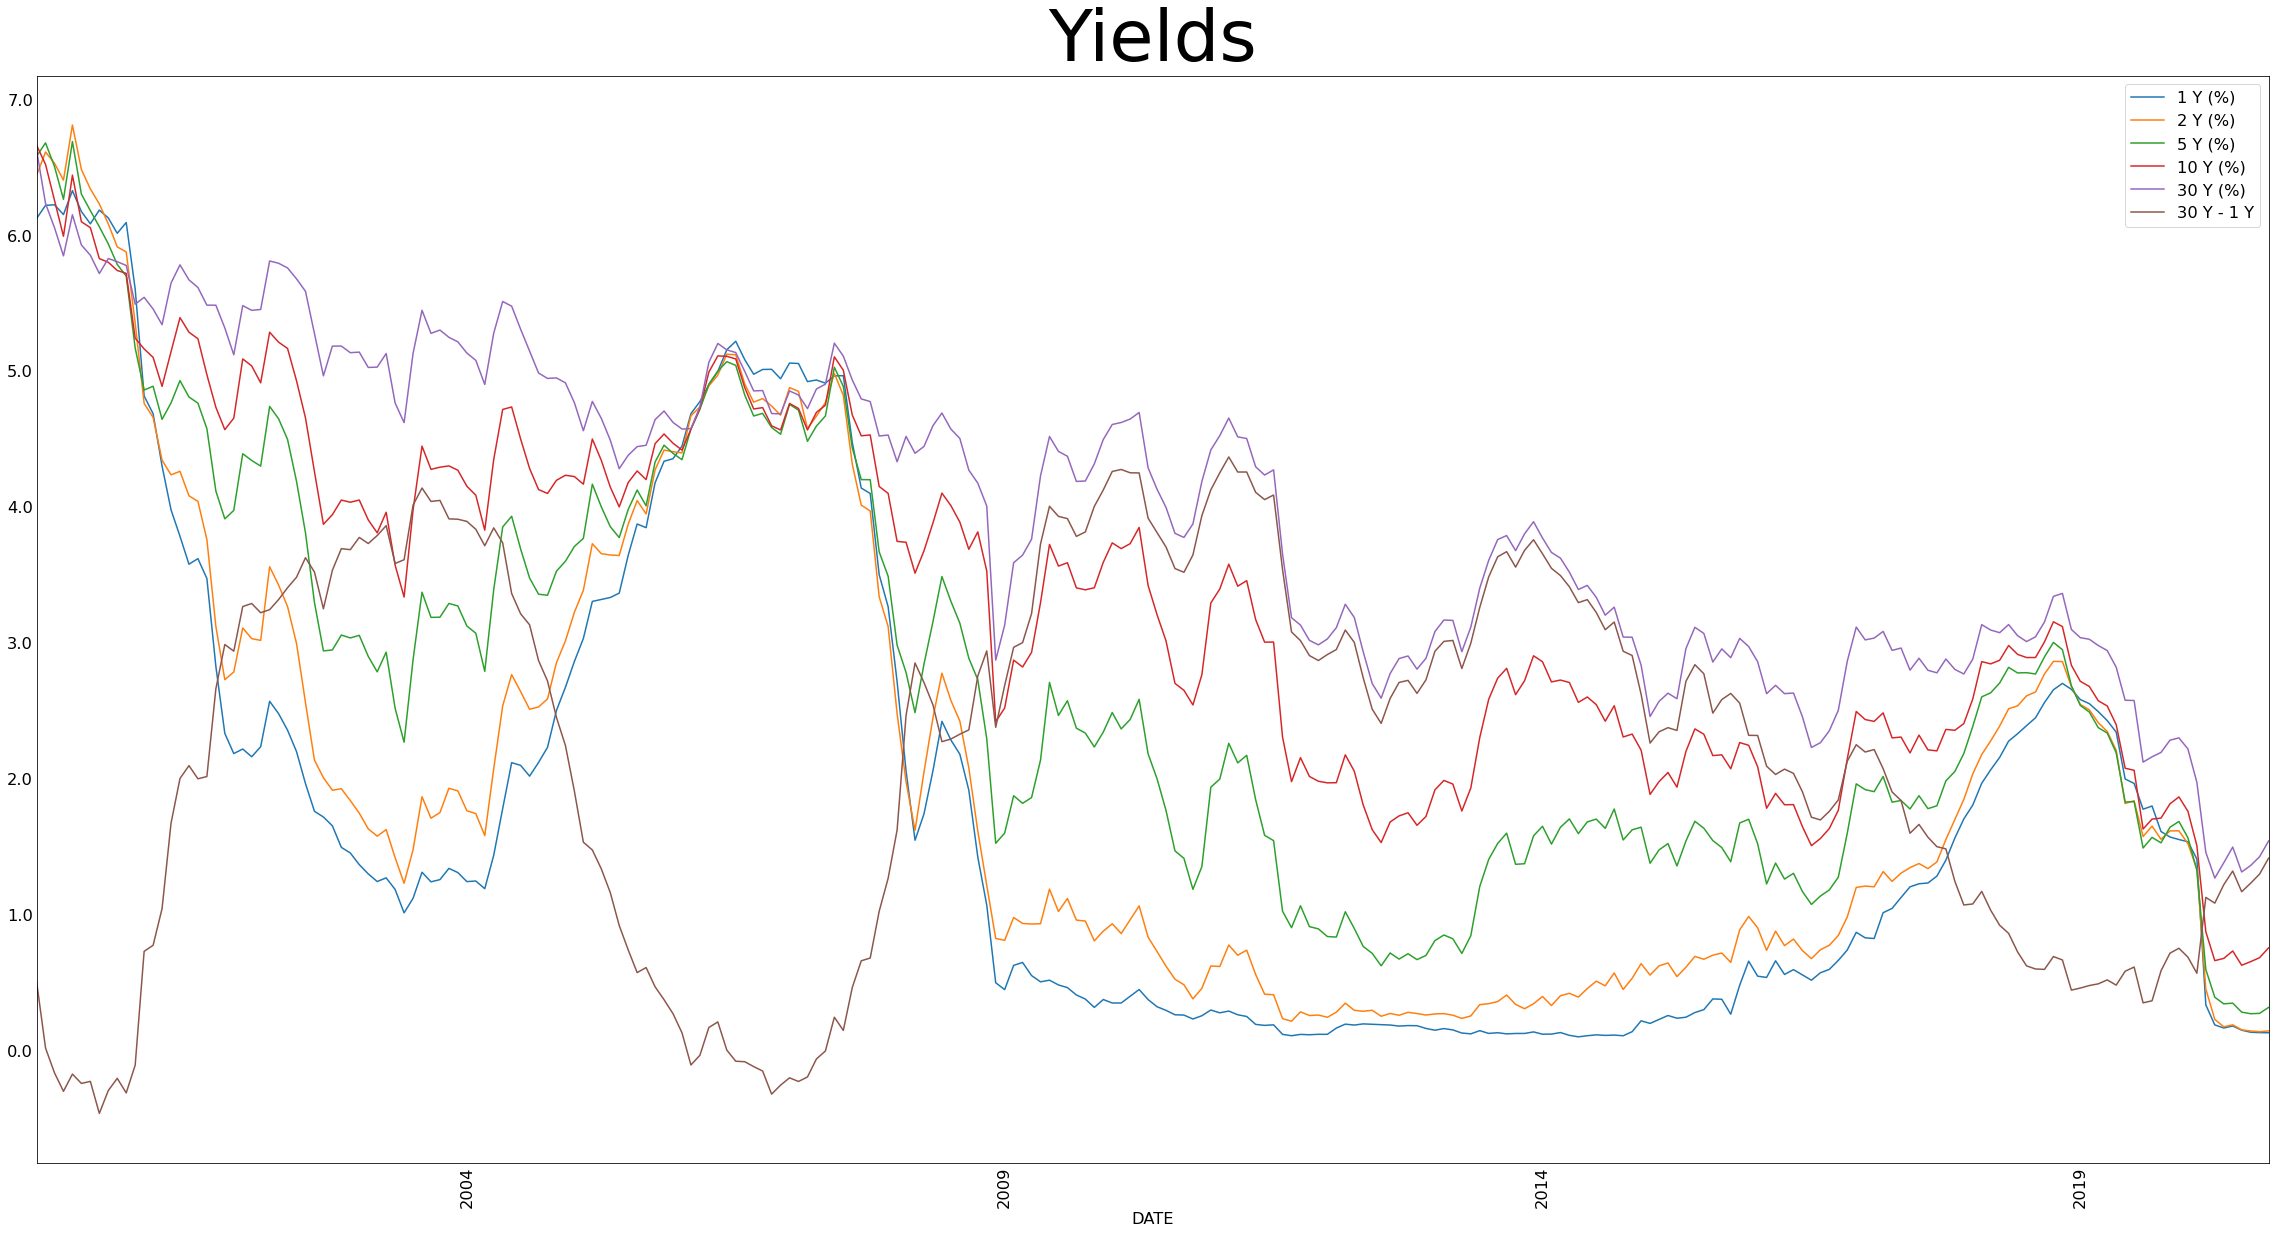

In [67]:
data_codes  = {"1 Y (%)": "DGS1",
               "2 Y (%)": "DGS2",
               "5 Y (%)": "DGS5",
               "10 Y (%)": "DGS10",
               "30 Y (%)": "DGS30"}
               
# start and end dates
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes, start = start, end = end, freq = "M").dropna()
data["30 Y - 1 Y"] = data["30 Y (%)"].sub(data["1 Y (%)"])



fig, (ax) = plot_lines(df = data[["1 Y (%)", "2 Y (%)", "5 Y (%)", "10 Y (%)", "30 Y (%)", "30 Y - 1 Y"]], title = "Yields", linewidth = 1.5, figsize = (40, 20), pp = None)

ax.fill_between(date, "5 Y (%)", "1 Y (%)", where= "5 Y (%)"< "1 Y (%)", facecolor='green', interpolate=True)

<ipython-input-143-783f853aa1ca>:30: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  plt.fill_between(x, "5 Y (%)", "1 Y (%)", where= "5 Y (%)"< "1 Y (%)", facecolor='green', interpolate=True)


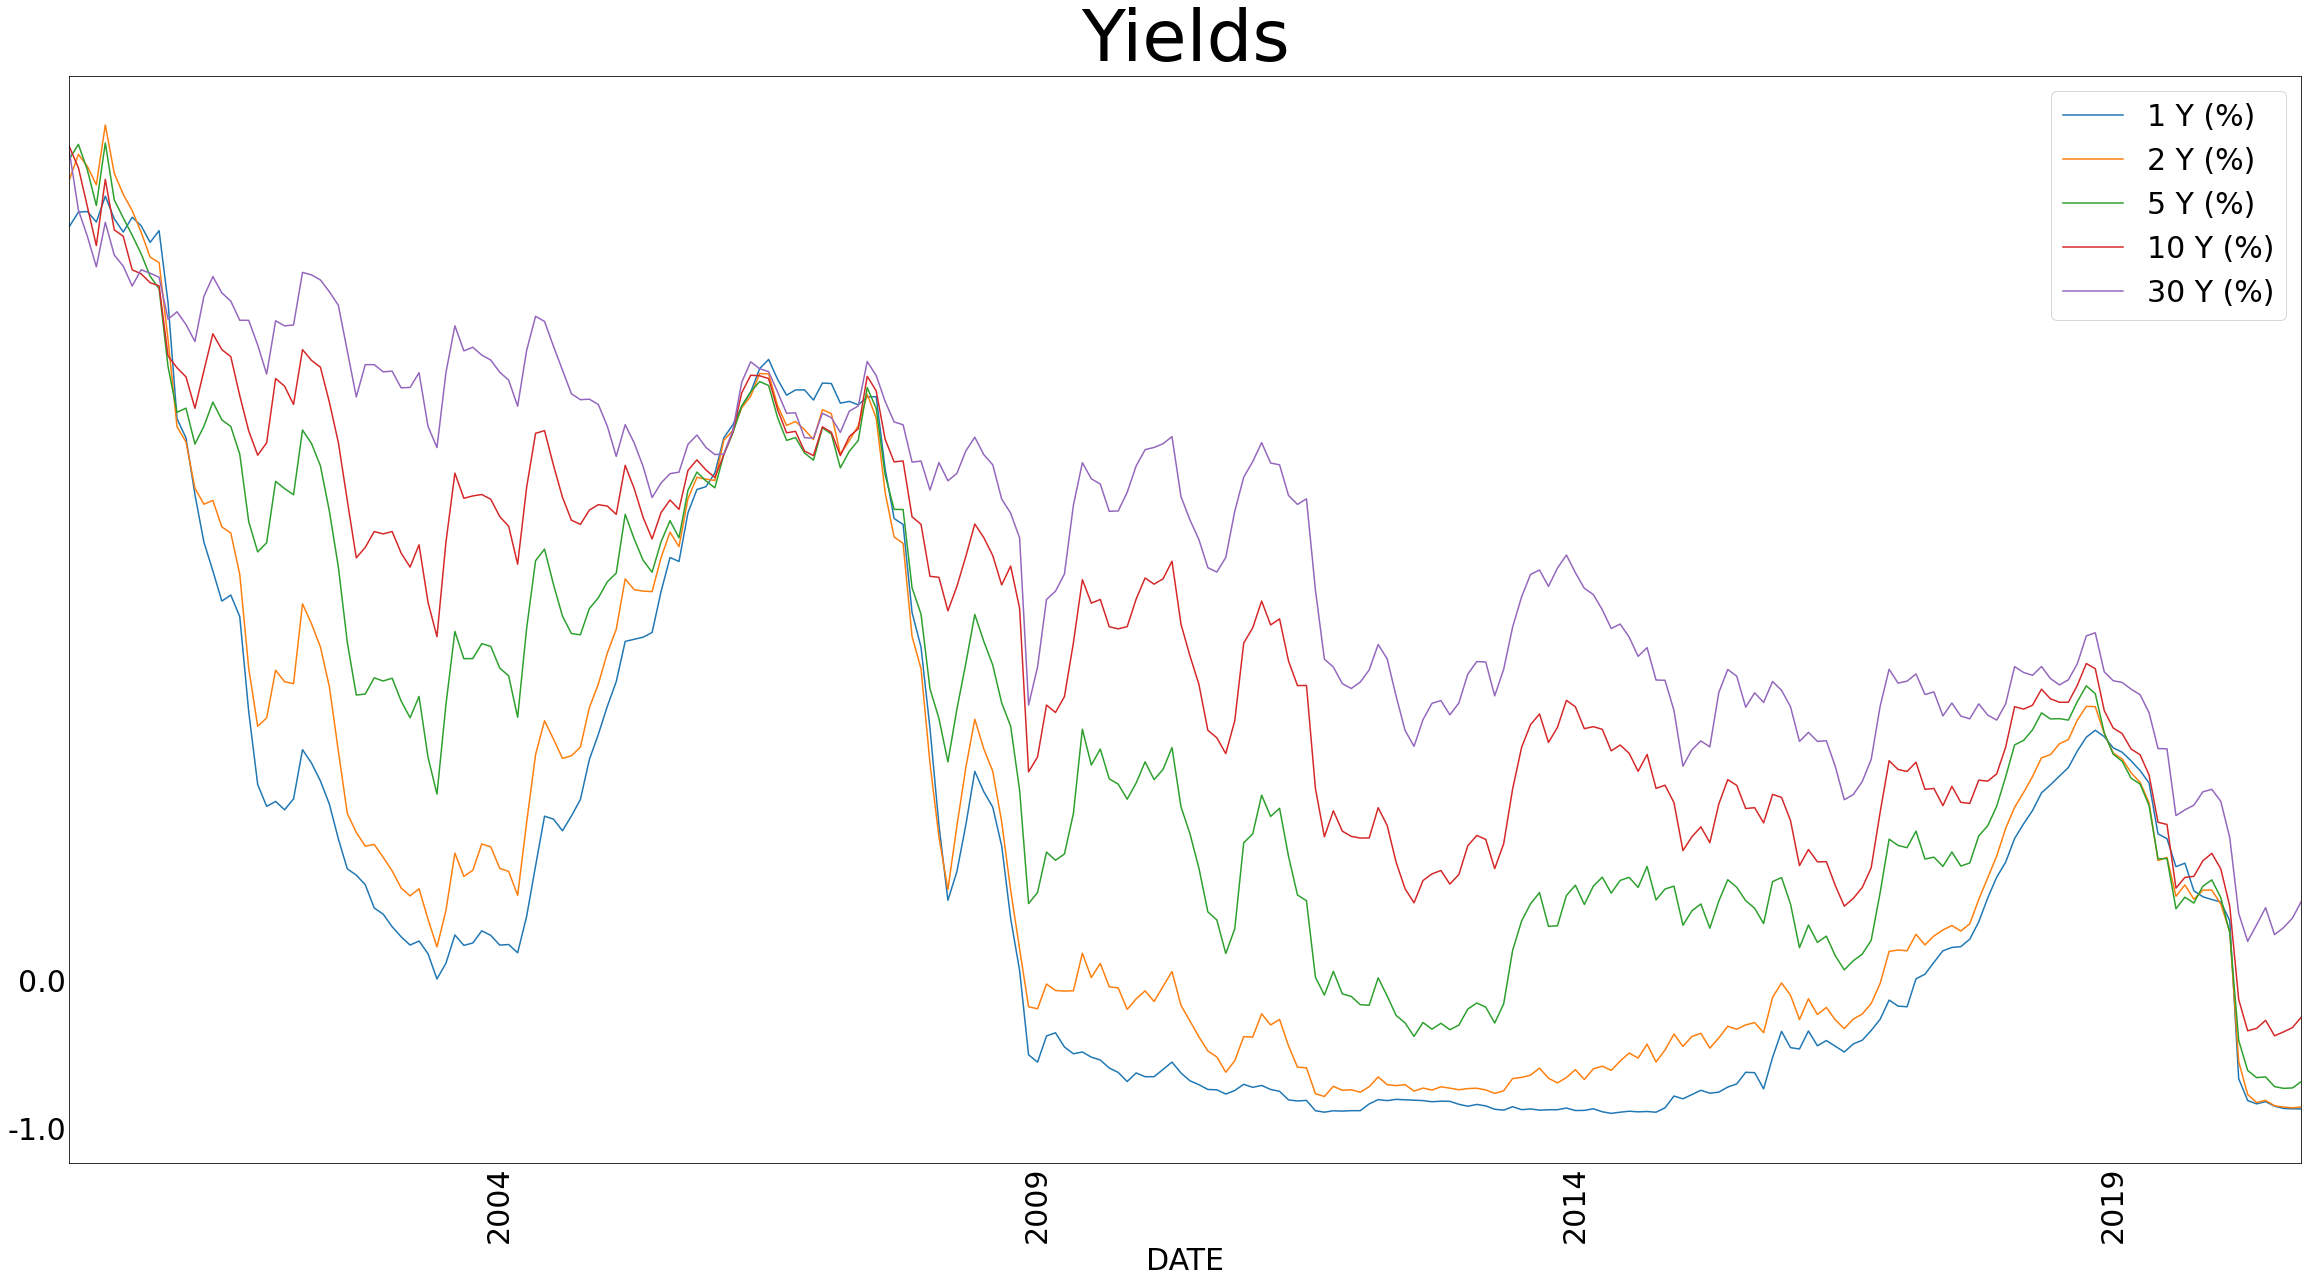

In [143]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

data_codes  = {"1 Y (%)": "DGS1",
               "2 Y (%)": "DGS2",
               "5 Y (%)": "DGS5",
               "10 Y (%)": "DGS10",
               "30 Y (%)": "DGS30"}

start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()
from datetime import datetime, timedelta

data = gather_data(data_codes = data_codes, start = start, end = end, freq = "M").dropna()
data["30 Y - 1 Y"] = data["30 Y (%)"].sub(data["1 Y (%)"])

x = np.arange(datetime(2000,1,1), datetime(2020,10,31), timedelta(days=1)).astype(datetime)
y1 = "1 Y (%)"
y2 = "2 Y (%)"
y3 = "5 Y (%)"
y4 = "10 Y (%)"
y5 = "30 Y (%)"


#plot_lines(df = data[["1 Y (%)", "2 Y (%)", "5 Y (%)", "10 Y (%)", "30 Y (%)", "30 Y - 1 Y"]], title = "Yields", linewidth = 1.5, figsize = (40, 20), pp = None)

plot_lines(df = data[[y1, y2, y3, y4, y5]], title = "Yields", linewidth = 1.5, figsize = (40, 20), pp = None)

plt.fill_between(x, "5 Y (%)", "1 Y (%)", where= "5 Y (%)"< "1 Y (%)", facecolor='green', interpolate=True)

#ax.fill_between(x, y1, y2, where=y2 < y1,facecolor='red', interpolate=True)

TypeError: cannot unpack non-iterable NoneType object

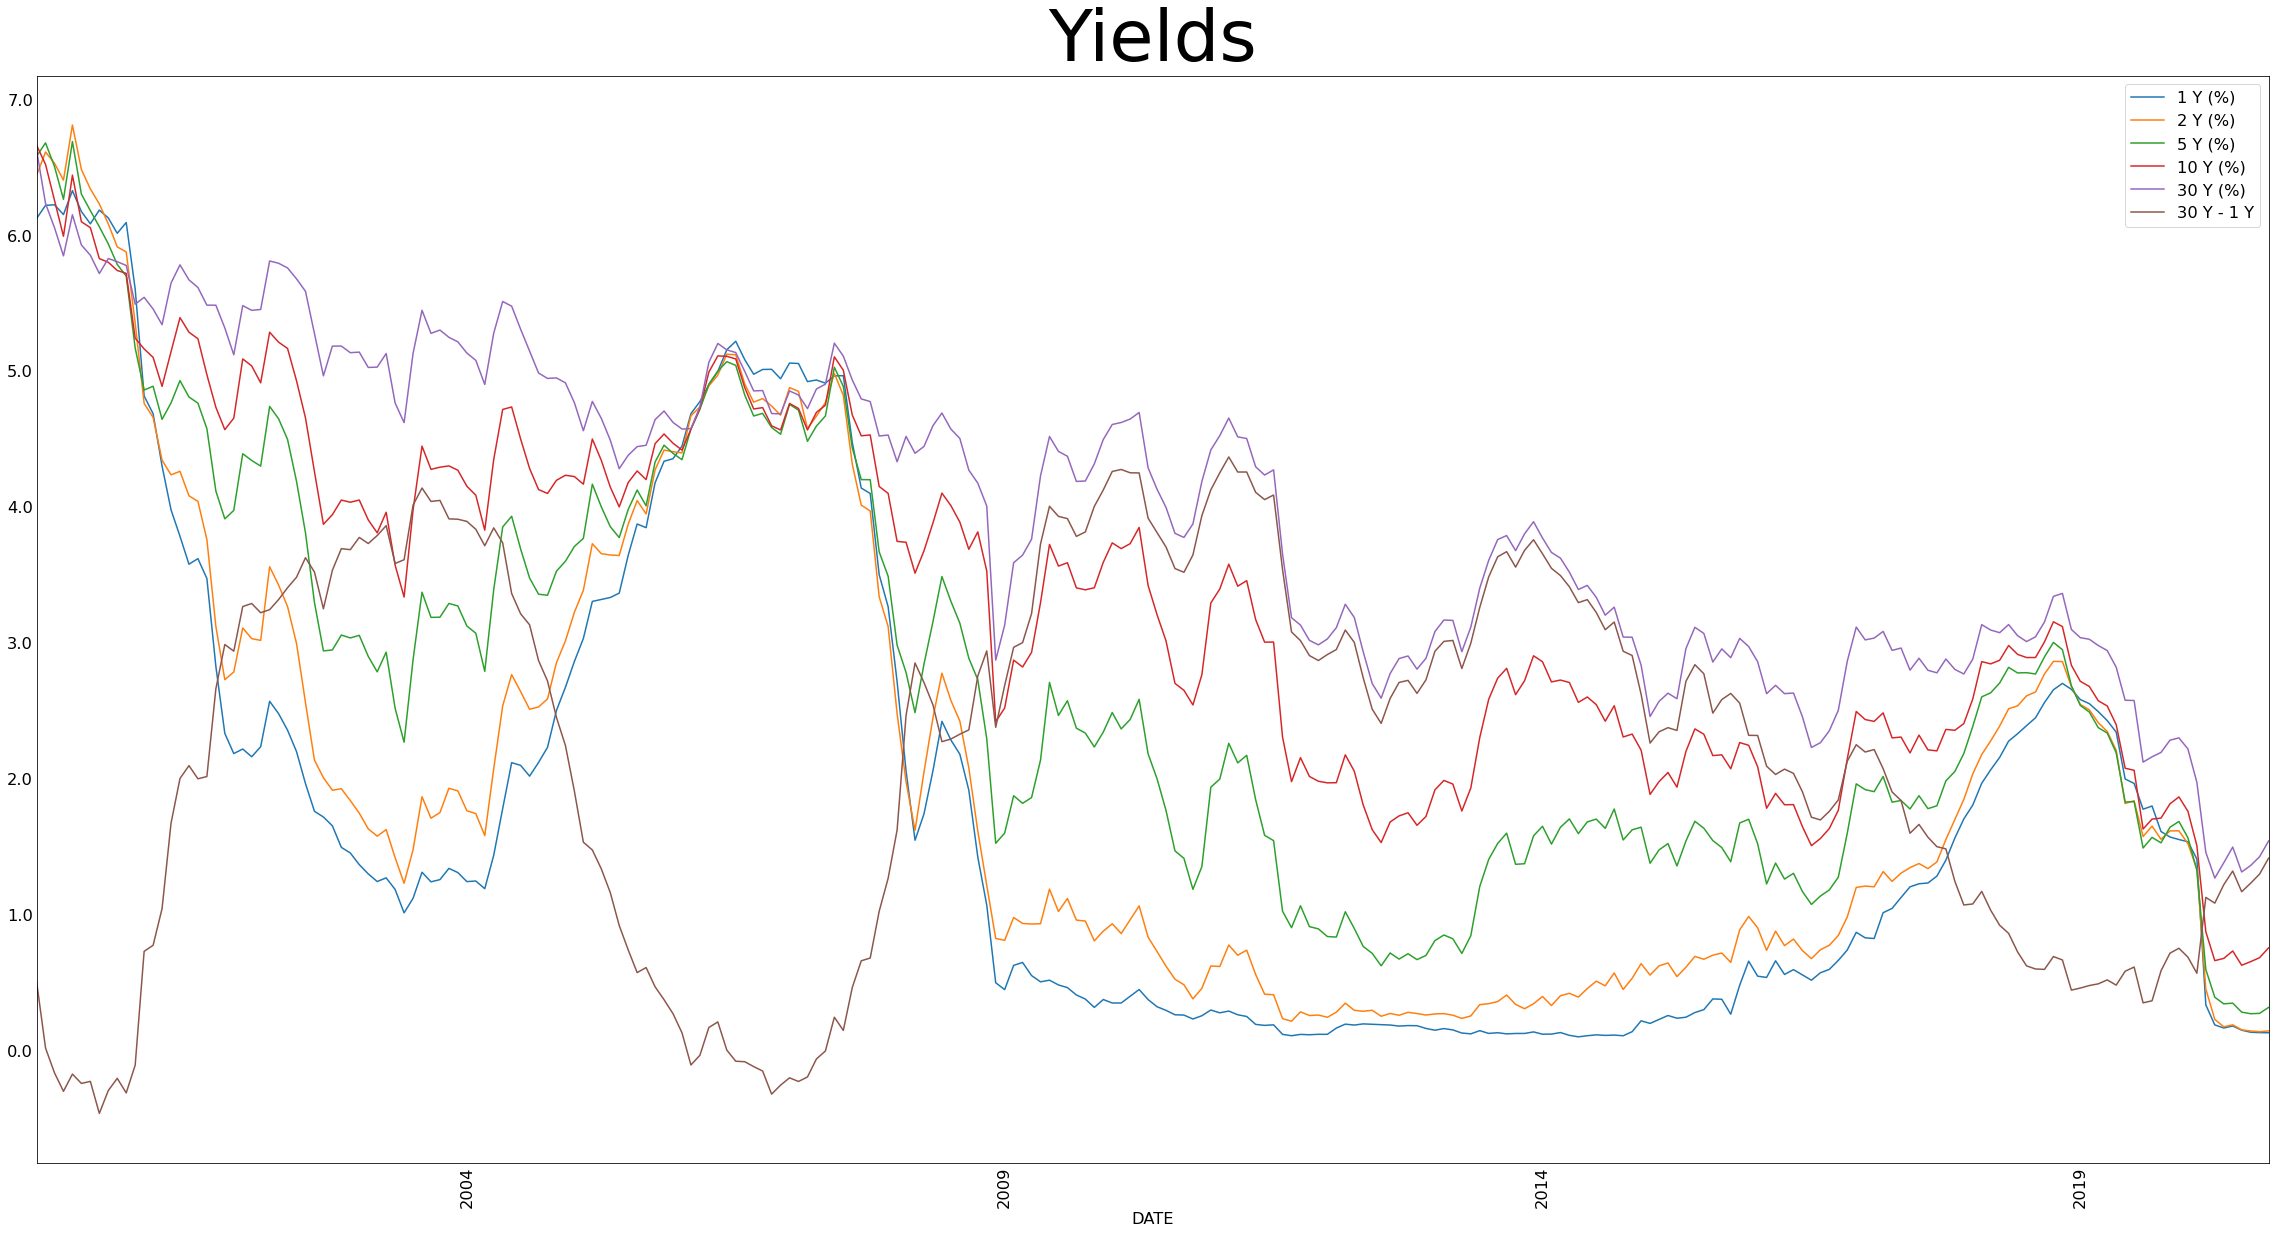

In [78]:
data_codes  = {"1 Y (%)": "DGS1",
               "2 Y (%)": "DGS2",
               "5 Y (%)": "DGS5",
               "10 Y (%)": "DGS10",
               "30 Y (%)": "DGS30"}
               
# start and end dates
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes, start = start, end = end, freq = "M").dropna()
data["30 Y - 1 Y"] = data["30 Y (%)"].sub(data["1 Y (%)"])


fig, (ax) = plot_lines(df = data[["1 Y (%)", "2 Y (%)", "5 Y (%)", "10 Y (%)", "30 Y (%)", "30 Y - 1 Y"]], title = "Yields", linewidth = 1.5, figsize = (40, 20), pp = None)

ax.fill_between(date, "5 Y (%)", "1 Y (%)", where= "5 Y (%)"< "1 Y (%)", facecolor='green', interpolate=True)